<a href="https://colab.research.google.com/github/charitha05/FinalYearProject/blob/main/c_IndianStocks__final_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/final_year_project/BSE_Stock_Dataset.csv")

<ipython-input-7-5b14a02c1fcc>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/final_year_project/BSE_Stock_Dataset.csv")


In [ ]:
data_e=pd.read_csv("/content/drive/MyDrive/final_year_project/Equity (2).csv")

In [ ]:
data.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Co Name'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673774 entries, 0 to 3673773
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   Open Price                 float64
 2   High Price                 float64
 3   Low Price                  float64
 4   Close Price                float64
 5   WAP                        float64
 6   No.of Shares               int64  
 7   No. of Trades              int64  
 8   Total Turnover (Rs.)       float64
 9   Deliverable Quantity       float64
 10  % Deli. Qty to Traded Qty  float64
 11  Spread High-Low            float64
 12  Spread Close-Open          float64
 13  Co Name                    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 392.4+ MB


In [ ]:
data['Co Name'].nunique()

4124

In [ ]:
#Data Cleaning- Removing companies with less than 2 months data
companies_to_remove = data['Co Name'].value_counts()[data['Co Name'].value_counts() < 100].index.tolist()
data = data[~data['Co Name'].isin(companies_to_remove)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662867 entries, 0 to 3673773
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   Open Price                 float64
 2   High Price                 float64
 3   Low Price                  float64
 4   Close Price                float64
 5   WAP                        float64
 6   No.of Shares               int64  
 7   No. of Trades              int64  
 8   Total Turnover (Rs.)       float64
 9   Deliverable Quantity       float64
 10  % Deli. Qty to Traded Qty  float64
 11  Spread High-Low            float64
 12  Spread Close-Open          float64
 13  Co Name                    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 419.2+ MB


In [ ]:
data['Co Name'].nunique()

3855

In [ ]:
data_e.columns

Index(['Security Code', 'Issuer Name', 'Security Id', 'Security Name',
       'Status', 'Group', 'Face Value', 'ISIN No', 'Industry', 'Instrument',
       'Sector Name', 'Industry New Name', 'Igroup Name', 'ISubgroup Name'],
      dtype='object')

In [ ]:
data_e['Security Code'].nunique()

4244

In [ ]:
data_e['Issuer Name'].nunique()

4236

In [ ]:
column_to_check = 'Issuer Name'

# Use value_counts to get a count of each unique value in the specified column
value_counts = data_e[column_to_check].value_counts()

# Use boolean indexing to filter values that appear more than once
duplicates = value_counts[value_counts > 1].index

# Display the values that appear more than once
print(list(duplicates))

['Reliance Mutual Fund-Permitted', 'Tata Motors Ltd.', 'GACM Technologies Limited', 'Future Enterprises Limited', 'Jain Irrigation Systems Ltd.,']


In [ ]:
data_e = data_e[~data_e[column_to_check].duplicated(keep=False)]

In [ ]:
data_e=data_e.dropna()

In [ ]:
data_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 0 to 4243
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Security Code      4231 non-null   int64  
 1   Issuer Name        4231 non-null   object 
 2   Security Id        4231 non-null   object 
 3   Security Name      4231 non-null   object 
 4   Status             4231 non-null   object 
 5   Group              4231 non-null   object 
 6   Face Value         4231 non-null   float64
 7   ISIN No            4231 non-null   object 
 8   Industry           4231 non-null   object 
 9   Instrument         4231 non-null   object 
 10  Sector Name        4231 non-null   object 
 11  Industry New Name  4231 non-null   object 
 12  Igroup Name        4231 non-null   object 
 13  ISubgroup Name     4231 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 495.8+ KB


In [ ]:
data_e['Security Code'].nunique()

4231

In [ ]:
data_e['Issuer Name'].nunique()

4231

In [ ]:
merged_df = pd.merge(data, data_e, left_on='Co Name', right_on='Security Code', how='inner')
# Add a new column 'Issuer Name' to df1 with values from df2
data['Issuer Name'] = merged_df['Issuer Name']
data['Sector']=merged_df['Sector Name']

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574516 entries, 0 to 3574515
Data columns (total 28 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   Open Price                 float64
 2   High Price                 float64
 3   Low Price                  float64
 4   Close Price                float64
 5   WAP                        float64
 6   No.of Shares               int64  
 7   No. of Trades              int64  
 8   Total Turnover (Rs.)       float64
 9   Deliverable Quantity       float64
 10  % Deli. Qty to Traded Qty  float64
 11  Spread High-Low            float64
 12  Spread Close-Open          float64
 13  Co Name                    object 
 14  Security Code              int64  
 15  Issuer Name                object 
 16  Security Id                object 
 17  Security Name              object 
 18  Status                     object 
 19  Group                      object 
 20  Fa

In [ ]:
merged_df['Co Name'].nunique()

3774

In [ ]:
merged_df['Issuer Name'].nunique()

3774

In [ ]:
merged_df['Security Code'].nunique()

3774

In [ ]:
print(merged_df.columns)

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Co Name', 'Security Code', 'Issuer Name',
       'Security Id', 'Security Name', 'Status', 'Group', 'Face Value',
       'ISIN No', 'Industry', 'Instrument', 'Sector Name', 'Industry New Name',
       'Igroup Name', 'ISubgroup Name'],
      dtype='object')


In [ ]:
mar_cap=pd.read_csv('/content/drive/MyDrive/final_year_project/Top Market Cap (1).csv')
mar_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1222 non-null   object 
 1   Ticker       1222 non-null   object 
 2   Sub-Sector   1203 non-null   object 
 3   Market Cap   1222 non-null   object 
 4   Close Price  1222 non-null   object 
 5   PE Ratio     1220 non-null   float64
 6   Beta         995 non-null    float64
dtypes: float64(2), object(5)
memory usage: 67.0+ KB


In [ ]:
mar_cap['Ticker'].nunique()

1222

In [ ]:
mar_cap['Market Cap'] = pd.to_numeric(mar_cap['Market Cap'].str.replace(',', ''), errors='coerce')
mar_cap=mar_cap[mar_cap['Market Cap'] > 1000]
unique_tickers_mar_cap = mar_cap['Ticker'].unique()
unique_security_ids_merged_df = merged_df['Security Id'].unique()
final_data = merged_df[merged_df['Security Id'].isin(unique_tickers_mar_cap)]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297301 entries, 0 to 3564951
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1297301 non-null  object 
 1   Open Price                 1297301 non-null  float64
 2   High Price                 1297301 non-null  float64
 3   Low Price                  1297301 non-null  float64
 4   Close Price                1297301 non-null  float64
 5   WAP                        1297301 non-null  float64
 6   No.of Shares               1297301 non-null  int64  
 7   No. of Trades              1297301 non-null  int64  
 8   Total Turnover (Rs.)       1297301 non-null  float64
 9   Deliverable Quantity       1293108 non-null  float64
 10  % Deli. Qty to Traded Qty  1293108 non-null  float64
 11  Spread High-Low            1297301 non-null  float64
 12  Spread Close-Open          1297301 non-null  float64
 13  Co Name     

In [ ]:
final_data['Co Name'].nunique()

1132

In [ ]:
final_data['Issuer Name'].nunique()

1132

In [ ]:
final_data.to_csv('Final Data.csv')

In [ ]:
final_data['Date'] = pd.to_datetime(final_data['Date'], infer_datetime_format=True)
final_data['Formatted_Date'] = final_data['Date'].dt.strftime('%d-%m-%Y')

<ipython-input-35-bd98b575223a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Date'] = pd.to_datetime(final_data['Date'], infer_datetime_format=True)
<ipython-input-35-bd98b575223a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Formatted_Date'] = final_data['Date'].dt.strftime('%d-%m-%Y')


In [ ]:
correlation_tables = []
pivot_table = data.pivot_table(index='Date', columns='Issuer Name', values='Close Price')
correlation_tables.append(pivot_table)
correlation_matrix = pivot_table.corr()
print(correlation_matrix)

Issuer Name                    Aurum PropTech Limited   Gland Pharma Limited  \
Issuer Name                                                                    
 Aurum PropTech Limited                      1.000000               0.652347   
 Gland Pharma Limited                        0.652347               1.000000   
 Max India Limited                          -0.234686               0.033033   
20 Microns Limited                          -0.193800               0.865221   
360 ONE WAM LIMITED                          0.403350               0.902984   
...                                               ...                    ...   
eClerx Services Limited                      0.513462               0.745293   
eMudhra Limited                              0.544690              -0.396287   
i Power Solutions India Ltd.                 0.762949                    NaN   
iStreet Network Limited                      0.686944               0.242156   
ramkrishna forgings Ltd.                

In [ ]:
grouped_data = final_data.groupby('Issuer Name')
def z_score_normalize(series):
    return (series - series.mean()) / series.std()

normalized_results = []

for name, group in grouped_data:
    group['NormalizedClosePrice'] = z_score_normalize(group['Close Price'])
    normalized_results.append(group)

# Concatenate the results back into a single DataFrame
final_data = pd.concat(normalized_results)


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297301 entries, 466691 to 2155094
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1297301 non-null  datetime64[ns]
 1   Open Price                 1297301 non-null  float64       
 2   High Price                 1297301 non-null  float64       
 3   Low Price                  1297301 non-null  float64       
 4   Close Price                1297301 non-null  float64       
 5   WAP                        1297301 non-null  float64       
 6   No.of Shares               1297301 non-null  int64         
 7   No. of Trades              1297301 non-null  int64         
 8   Total Turnover (Rs.)       1297301 non-null  float64       
 9   Deliverable Quantity       1293108 non-null  float64       
 10  % Deli. Qty to Traded Qty  1293108 non-null  float64       
 11  Spread High-Low            12973

In [ ]:
import pandas as pd

window_size_s = 21 #1month
window_size_l = 63 #3months
grouped_data = final_data.groupby('Issuer Name')
results = []
for name, group in grouped_data:
    # Calculate rolling moving average for 'Close Price'
    group['Moving_avg_s'] = group['NormalizedClosePrice'].rolling(window=window_size_s).mean()
    group['Moving_avg_l'] = group['NormalizedClosePrice'].rolling(window=window_size_l).mean()
    # Fill initial NaN values in 'Moving_avg' with the moving average of the first window
    group['Moving_avg_s'].fillna(group['Moving_avg_s'].iloc[window_size_s - 1], inplace=True)
    group['Moving_avg_l'].fillna(group['Moving_avg_l'].iloc[window_size_l - 1], inplace=True)
    # Fill subsequent NaN values in 'Moving_avg' with the previous moving average
    group['Moving_avg_s'].fillna(group['Moving_avg_s'].shift(1), inplace=True)
    group['Moving_avg_l'].fillna(group['Moving_avg_l'].shift(1), inplace=True)
    # Calculate short-term noise for the 'NormalizedClosePrice' column
    group['F1'] = (group['NormalizedClosePrice']-group['Moving_avg_s'])/group['Moving_avg_s']
    group['F3'] = group['Moving_avg_s'].diff() / group['Moving_avg_s'].shift(1)
    group['F5'] = (group['NormalizedClosePrice'] - group['Moving_avg_s'].min()) / \
                  (group['Moving_avg_s'].max() - group['Moving_avg_s'].min())
    group['F2'] = (group['NormalizedClosePrice']-group['Moving_avg_l'])/group['Moving_avg_l']
    group['F4'] = group['Moving_avg_l'].diff() / group['Moving_avg_l'].shift(1)
    group['F6'] = (group['NormalizedClosePrice'] - group['Moving_avg_l'].min()) / \
                  (group['Moving_avg_l'].max() - group['Moving_avg_l'].min())

    results.append(group)
final_result = pd.concat(results)

In [ ]:
# Create a new DataFrame with selected columns
selected_columns = ['Issuer Name', 'Date','NormalizedClosePrice','Moving_avg_s','Moving_avg_l','F1','F2','F3','F4','F5','F6','Sector Name']
result_subset = final_result[selected_columns]
result_subset.info()
# Save the new DataFrame to a CSV file
result_subset.to_csv('Features.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297301 entries, 466691 to 2155094
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Issuer Name           1297301 non-null  object        
 1   Date                  1297301 non-null  datetime64[ns]
 2   NormalizedClosePrice  1297301 non-null  float64       
 3   Moving_avg_s          1297301 non-null  float64       
 4   Moving_avg_l          1297301 non-null  float64       
 5   F1                    1297301 non-null  float64       
 6   F2                    1297301 non-null  float64       
 7   F3                    1296169 non-null  float64       
 8   F4                    1296169 non-null  float64       
 9   F5                    1297301 non-null  float64       
 10  F6                    1297301 non-null  float64       
 11  Sector Name           1297301 non-null  object        
dtypes: datetime64[ns](1), float64(9), obj

In [ ]:
final_std_data = result_subset.groupby(['Issuer Name', 'Sector Name']).agg({
    'F1': 'std',
    'F2': 'std',
    'F3': 'std',
    'F4': 'std',
    'F5': 'std',
    'F6': 'std'
}).reset_index()

In [ ]:
final_std_data.to_csv('Aggregate_features.csv', index=False)

In [ ]:
final_std_data=pd.read_csv("/content/Aggregate_features.csv")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Create a DataFrame to store cosine similarity values
cosine_similarity_df = pd.DataFrame(index=final_std_data['Issuer Name'].unique(), columns=final_std_data['Issuer Name'].unique())

for issuer_name1 in tqdm(final_std_data['Issuer Name'].unique(), desc="Processing Issuer Names"):
    for issuer_name2 in final_std_data['Issuer Name'].unique():
        vector1 = final_std_data.loc[final_std_data['Issuer Name'] == issuer_name1, ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']].values
        vector2 = final_std_data.loc[final_std_data['Issuer Name'] == issuer_name2, ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']].values
        # Calculate cosine similarity
        similarity = cosine_similarity(vector1, vector2)[0][0]
        # Update the corresponding cell in the cosine_similarity_df DataFrame
        cosine_similarity_df.at[issuer_name1, issuer_name2] = similarity

# Save the result to CSV
cosine_similarity_df.to_csv('cosine_similarity_matrix_direct_P2.csv')


Processing Issuer Names: 100%|██████████| 1132/1132 [1:13:50<00:00,  3.91s/it]


In [ ]:
correlation_matrix=pd.read_csv('/content/cosine_similarity_matrix_direct_P2.csv')

In [ ]:
correlation_matrix=cosine_similarity_df.copy()

In [ ]:
correlation_matrix.fillna(0, inplace=True)

In [ ]:
correlation_matrix

,Unnamed: 0,Gland Pharma Limited,360 ONE WAM LIMITED,3M India Ltd.,5paisa Capital Limited,63 Moons Technologies Limited,AAVAS Financiers Limited,ABB India Limited,ACC Ltd,ACCELYA SOLUTIONS INDIA LIMITED,...,Zee Entertainment Enterprises Ltd.,Zee Media Corporation Limited,Zen Technologies Ltd.,Zensar Technologies Ltd.,Zomato Limited,Zydus Lifesciences Limited,Zydus Wellness Limited,eClerx Services Limited,eMudhra Limited,ramkrishna forgings Ltd.
0,Gland Pharma Limited,1.000000,0.898934,0.928312,0.936884,0.977803,0.997886,0.970340,0.950521,0.405056,...,0.996065,0.988703,0.798300,0.810548,0.980084,0.944911,0.973682,0.978875,0.970419,0.890162
1,360 ONE WAM LIMITED,0.898934,1.000000,0.996646,0.689806,0.788654,0.868770,0.769685,0.987545,0.759347,...,0.857888,0.826797,0.980434,0.983949,0.797058,0.991596,0.775787,0.806023,0.767339,0.998328
2,3M India Ltd.,0.928312,0.996646,1.000000,0.740293,0.830388,0.902237,0.812206,0.993333,0.712921,...,0.892530,0.863955,0.961539,0.969609,0.837206,0.998266,0.819490,0.843154,0.811625,0.995161
3,5paisa Capital Limited,0.936884,0.689806,0.740293,1.000000,0.989051,0.957581,0.992305,0.786783,0.060721,...,0.963624,0.976986,0.540102,0.554801,0.986381,0.770904,0.991900,0.977838,0.993431,0.674981
4,63 Moons Technologies Limited,0.977803,0.788654,0.830388,0.989051,1.000000,0.989322,0.999208,0.868829,0.205164,...,0.992347,0.997648,0.658117,0.670448,0.999689,0.855509,0.999550,0.994486,0.999127,0.775378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,Zydus Lifesciences Limited,0.944911,0.991596,0.998266,0.770904,0.855509,0.921688,0.838591,0.994191,0.681746,...,0.912702,0.886372,0.947604,0.957441,0.861962,1.000000,0.845548,0.866907,0.838036,0.990126
1128,Zydus Wellness Limited,0.973682,0.775787,0.819490,0.991900,0.999550,0.986399,0.998887,0.857529,0.186850,...,0.989636,0.995578,0.641471,0.655869,0.998581,0.845548,1.000000,0.992465,0.999796,0.763136
1129,eClerx Services Limited,0.978875,0.806023,0.843154,0.977838,0.994486,0.988164,0.994780,0.885521,0.231928,...,0.989821,0.996498,0.686173,0.689644,0.996104,0.866907,0.992465,1.000000,0.992887,0.789456
1130,eMudhra Limited,0.970419,0.767339,0.811625,0.993431,0.999127,0.983971,0.999068,0.851309,0.172680,...,0.987389,0.994554,0.631883,0.645279,0.998070,0.838036,0.999796,0.992887,1.000000,0.753902


Processing Thresholds: 100%|██████████| 51/51 [32:55<00:00, 38.73s/it]


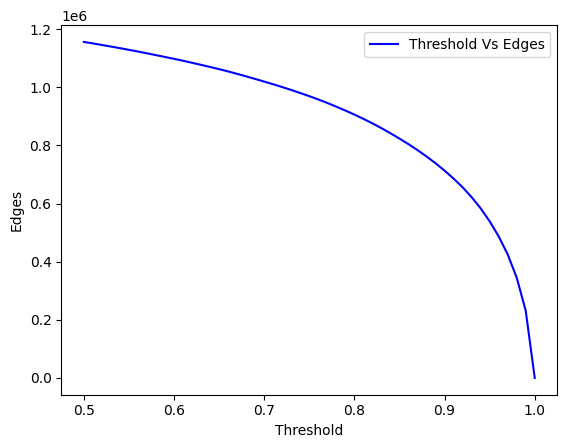

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

start = 0.5
end = 1.0
step = 0.01

threshold = []
degree = []

# Use tqdm to show a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            weight = correlation_matrix.iloc[i, j]  # Access the correlation using .iloc
            if abs(weight) >= t:
                edges.append([i, j, weight])

    x = len(edges)
    degree.append(x)

# Plot the data
plt.plot(threshold, degree, label='Threshold Vs Edges', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Edges')

# Add a legend
plt.legend()
plt.show()


In [ ]:
# Set the threshold value
import pandas as pd
threshold = 0.98

  # Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
for i in range(len(company_names)-1):
  for j in range(i+1,len(company_names)):
    from_edge = company_names[i+1]
    to_edge = company_names[j]
    weight = correlation_matrix.iloc[i, j]
    if abs(weight) >= threshold:
      edges.append([from_edge, to_edge, weight])
# Create a DataFrame from the edges list
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Export the edge list as a CSV file
edge_list.to_csv('bseedge_list500.csv', index=False)

In [ ]:
edge_list=pd.read_csv('bseedge_list.csv')

In [ ]:
print(edge_list)

                          Source                           Target    Weight
0           Gland Pharma Limited             Gland Pharma Limited  1.000000
1           Gland Pharma Limited         AAVAS Financiers Limited  0.997886
2           Gland Pharma Limited  ALEMBIC PHARMACEUTICALS LIMITED  0.998440
3           Gland Pharma Limited         APL Apollo Tubes Limited  0.994209
4           Gland Pharma Limited      ASIAN GRANITO INDIA LIMITED  0.988197
...                          ...                              ...       ...
173109    Zydus Wellness Limited                  eMudhra Limited  0.999796
173110   eClerx Services Limited          eClerx Services Limited  1.000000
173111   eClerx Services Limited                  eMudhra Limited  0.992887
173112           eMudhra Limited                  eMudhra Limited  1.000000
173113  ramkrishna forgings Ltd.         ramkrishna forgings Ltd.  1.000000

[173114 rows x 3 columns]


In [ ]:
import networkx as nx
# Create an empty graph
G = nx.Graph()

# Iterate over the edge list and add nodes and weighted edges to the graph
for row in edge_list.itertuples():
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight)

communities_generator = nx.community.louvain_communities(G)
communities_l = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities_l)
print("Modularity:", modularity)
print("Number of Communities:", len(communities_l))

Modularity: 0.4344198132754592
Number of Communities: 7


In [ ]:
for i, community in enumerate(communities_l):
  print(f"Community {i + 1}:",len(community))

Community 1: 370
Community 2: 342
Community 3: 144
Community 4: 273
Community 5: 1
Community 6: 1
Community 7: 1


Processing Thresholds: 100%|██████████| 51/51 [1:00:18<00:00, 70.96s/it]


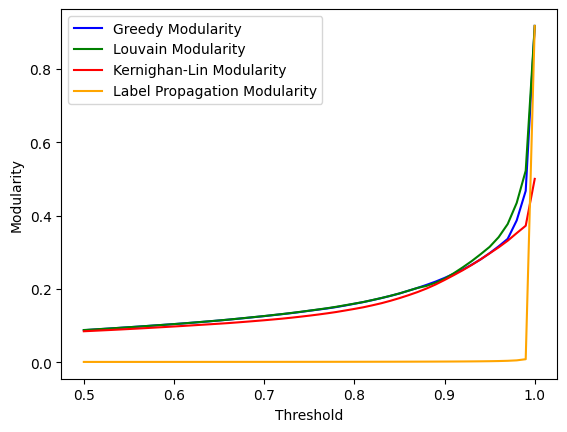

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

start = 0.5
end = 1.0
step = 0.01

threshold = []
modularity_greedy = []
modularity_louvain = []
modularity_kernighan_lin = []
#modularity_k_clique = []
modularity_label_propagation = []

# Use tqdm to wrap the outer loop for a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)
    company_names = correlation_matrix.columns.tolist()

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(company_names)):
        for j in range(i, len(company_names)):
            from_edge = company_names[i]
            to_edge = company_names[j]
            weight = correlation_matrix.iloc[i, j]
            if abs(weight) >= t:
                edges.append([from_edge, to_edge, weight])

    # Create a DataFrame from the edges list
    edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

    # Create an empty graph
    G = nx.Graph()

    # Iterate over the edge list and add nodes and weighted edges to the graph
    for row in edge_list.itertuples():
        source = row.Source
        target = row.Target
        weight = row.Weight
        G.add_node(source)
        G.add_node(target)
        G.add_edge(source, target, weight=weight)

    # Greedy Modularity
    communities_greedy = list(nx.community.greedy_modularity_communities(G))
    modularity_greedy.append(nx.community.modularity(G, communities_greedy))

    # Louvain Modularity
    communities_louvain = list(nx.community.louvain_communities(G))
    modularity_louvain.append(nx.community.modularity(G, communities_louvain))

    # Kernighan-Lin Modularity
    communities_kernighan_lin = nx.community.kernighan_lin_bisection(G)
    modularity_kernighan_lin.append(nx.community.modularity(G, [set(communities_kernighan_lin[0]), set(communities_kernighan_lin[1])]))

    # # k-clique Modularity
    # communities_k_clique = list(nx.community.k_clique_communities(G, 3))  # Adjust the clique size
    # modularity_k_clique.append(nx.community.modularity(G, communities_k_clique))

    # Label Propagation Modularity
    communities_label_propagation = list(nx.community.label_propagation_communities(G))
    modularity_label_propagation.append(nx.community.modularity(G, communities_label_propagation))

# Plot the data
plt.plot(threshold, modularity_greedy, label='Greedy Modularity', color='blue')
plt.plot(threshold, modularity_louvain, label='Louvain Modularity', color='green')
plt.plot(threshold, modularity_kernighan_lin, label='Kernighan-Lin Modularity', color='red')
#plt.plot(threshold, modularity_k_clique, label='k-clique Modularity', color='purple')
plt.plot(threshold, modularity_label_propagation, label='Label Propagation Modularity', color='orange')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Modularity')

# Add a legend
plt.legend()
plt.show()


In [ ]:
import networkx as nx
# Create an empty graph
G = nx.Graph()

# Iterate over the edge list and add nodes and weighted edges to the graph
for row in edge_list.itertuples():
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight)

communities_generator = nx.community.louvain_communities(G)
communities_l = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities_l)
print("Modularity:", modularity)
print("Number of Communities:", len(communities_l))

Modularity: 0.43348729772325867
Number of Communities: 7


In [ ]:
for i, community in enumerate(communities_l):
  print(f"Community {i + 1}:",len(community))

Community 1: 342
Community 2: 377
Community 3: 273
Community 4: 137
Community 5: 1
Community 6: 1
Community 7: 1


Processing Thresholds: 100%|██████████| 51/51 [44:21<00:00, 52.19s/it]


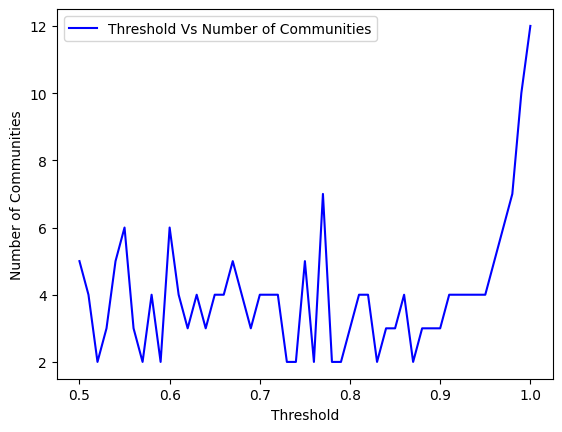

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

start = 0.5
end = 1.0
step = 0.01

threshold = []
num_communities = []

# Use tqdm to wrap the outer loop for a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)
    company_names = correlation_matrix.columns.tolist()

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(company_names)):
        for j in range(len(company_names)):
            from_edge = company_names[i]
            to_edge = company_names[j]
            weight = correlation_matrix.iloc[i, j]
            if abs(weight) >= t:
                edges.append([from_edge, to_edge, weight])

    # Create a DataFrame from the edges list
    edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

    # Create an empty graph
    G = nx.Graph()

    # Iterate over the edge list and add nodes and weighted edges to the graph
    for row in edge_list.itertuples():
        source = row.Source
        target = row.Target
        weight = row.Weight
        G.add_node(source)
        G.add_node(target)
        G.add_edge(source, target, weight=weight)

    # Louvain Modularity
    communities_generator = nx.community.louvain_communities(G)
    communities_l = list(communities_generator)  # Get the list of communities
    num_communities.append(len(communities_l))

# Plot the data
plt.plot(threshold, num_communities, label='Threshold Vs Number of Communities', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Number of Communities')

# Add a legend
plt.legend()
plt.show()


In [ ]:
import networkx as nx

# Get the greedy modularity communities
communities_generator = nx.community.greedy_modularity_communities(G)
communities = list(communities_generator)  # Get the list of communities

if communities:
    modularity = nx.community.modularity(G, communities)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))

    # Print values in each community
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 0.38677022013771706
Number of Communities: 6
Community 1: 556
Community 2: 437
Community 3: 136
Community 4: 1
Community 5: 1
Community 6: 1


In [ ]:
# Modularity
communities_generator = nx.community.label_propagation_communities(G)
communities =list(communities_generator)  # Get the first partition

if communities is not None:
    modularity = nx.community.modularity(G, communities_generator)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 0.0055519019244268395
Number of Communities: 1132
Community 1: 1
Community 2: 1
Community 3: 1
Community 4: 1
Community 5: 1
Community 6: 1
Community 7: 1
Community 8: 1
Community 9: 1
Community 10: 1
Community 11: 1
Community 12: 1
Community 13: 1
Community 14: 1
Community 15: 1
Community 16: 1
Community 17: 1
Community 18: 1
Community 19: 1
Community 20: 1
Community 21: 1
Community 22: 1
Community 23: 1
Community 24: 1
Community 25: 1
Community 26: 1
Community 27: 1
Community 28: 1
Community 29: 1
Community 30: 1
Community 31: 1
Community 32: 1
Community 33: 1
Community 34: 1
Community 35: 1
Community 36: 1
Community 37: 1
Community 38: 1
Community 39: 1
Community 40: 1
Community 41: 1
Community 42: 1
Community 43: 1
Community 44: 1
Community 45: 1
Community 46: 1
Community 47: 1
Community 48: 1
Community 49: 1
Community 50: 1
Community 51: 1
Community 52: 1
Community 53: 1
Community 54: 1
Community 55: 1
Community 56: 1
Community 57: 1
Community 58: 1
Community 59: 1
Com

In [ ]:
# Modularity
communities_generator = nx.community.kernighan_lin_bisection(G)
communities =list(communities_generator)  # Get the first partition

if communities is not None:
    modularity = nx.community.modularity(G, communities_generator)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 0.35218720019958294
Number of Communities: 2
Community 1: 566
Community 2: 566


In [ ]:
# Calculate network science parameters
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)
print("Company with Maximum Degree Centrality:")
print("Company Name:", max_degree_node)
print("Degree Centrality:", degree_centrality[max_degree_node])
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
print("Company with Maximum Betweenness Centrality:")
print("Company Name:", max_betweenness_node)
print("Betweenness Centrality:", betweenness_centrality[max_betweenness_node])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
print("Company with Maximum Closeness Centrality:")
print("Company Name:", max_closeness_node)
print("Closeness Centrality:", closeness_centrality[max_closeness_node])

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Company with Maximum Eigenvector Centrality:")
print("Company Name:", max_eigenvector_node)
print("Eigenvector Centrality:", eigenvector_centrality[max_eigenvector_node])

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
max_clustering_node = max(clustering_coefficient, key=clustering_coefficient.get)
print("Company with Maximum Clustering Coefficient:")
print("Company Name:", max_clustering_node)
print("Clustering Coefficient:", clustering_coefficient[max_clustering_node])


Company with Maximum Degree Centrality:
Company Name: Knowledge Marine & Engineering Works Limited
Degree Centrality: 0.43678160919540227
Company with Maximum Betweenness Centrality:
Company Name: GE Power India Limited
Betweenness Centrality: 0.008306436530607971
Company with Maximum Closeness Centrality:
Company Name: Himatsingka Seide Ltd.,
Closeness Centrality: 0.4399718254046467
Company with Maximum Eigenvector Centrality:
Company Name: Ultramarine & Pigments Ltd.,
Eigenvector Centrality: 0.05111771140276541
Company with Maximum Clustering Coefficient:
Company Name: Somany Ceramics Limited
Clustering Coefficient: 1.0


Community 1:
Lead Node: Jyoti Resins & Adhesives Ltd,, Degree Centrality: 1.0058651026392962
Lag Node: Nitin Spinners Ltd., Degree Centrality: 0.6480938416422287

Community 2:
Lead Node: Wonderla Holidays Limited, Degree Centrality: 0.6910569105691057
Lag Node: Neuland Laboratories Limited., Degree Centrality: 0.013550135501355014

Community 3:
Lead Node: OLECTRA GREENTECH LIMITED, Degree Centrality: 1.0036764705882353
Lag Node: KFin Technologies Limited, Degree Centrality: 0.0661764705882353

Community 4:
Lead Node: Precision Wires India ltd.,, Degree Centrality: 0.958041958041958
Lag Node: Info Edge(India) Ltd., Degree Centrality: 0.26573426573426573

Community 5:
Lead Node: Elpro International Ltd.,, Degree Centrality: 1
Lag Node: Elpro International Ltd.,, Degree Centrality: 1

Community 6:
Lead Node: PNB Gilts Ltd, Degree Centrality: 1
Lag Node: PNB Gilts Ltd, Degree Centrality: 1

Community 7:
Lead Node: Rashtriya Chemicals & Fertilizers Limited, Degree Centrality: 1
Lag Node: Ra

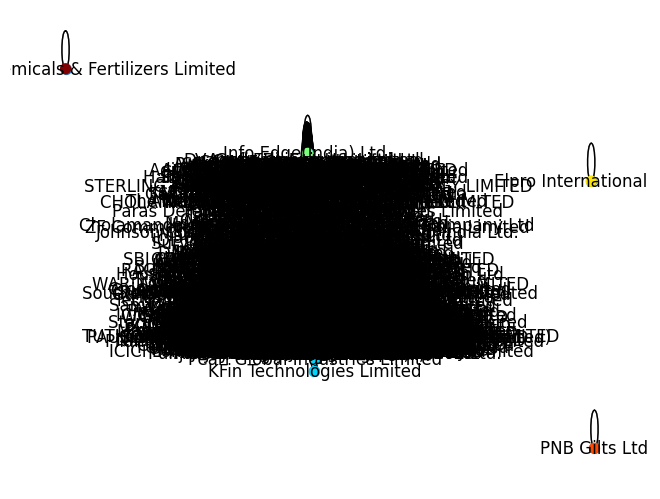

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

communities_generator = nx.community.louvain_communities(G)
communities = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities)
# Create a mapping of nodes to communities
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

# Extract positions of nodes in the graph
pos = nx.spring_layout(G)

# Create a custom color map for communities
num_communities = len(communities)
cmap = plt.get_cmap('jet', num_communities)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw nodes with colors based on communities using the custom color map
node_colors = [community_mapping[node] for node in G.nodes()]
node_color_values = [cmap(i) for i in node_colors]
nx.draw_networkx_nodes(G, pos, node_color=node_color_values, node_size=50)

# Add a legend
legend_labels = {community_id: f"Community {community_id}" for community_id in set(community_mapping.values())}

# Compute degree centrality for each community
for community_id, community in enumerate(communities):
    community_subgraph = G.subgraph(community)

    # Compute degree centrality
    degree_centrality = nx.degree_centrality(community_subgraph)

    # Find lead and lag nodes based on degree centrality
    lead_node = max(degree_centrality, key=degree_centrality.get)
    lag_node = min(degree_centrality, key=degree_centrality.get)

    print(f"Community {community_id + 1}:")
    print(f"Lead Node: {lead_node}, Degree Centrality: {degree_centrality[lead_node]}")
    print(f"Lag Node: {lag_node}, Degree Centrality: {degree_centrality[lag_node]}")
    print()

# Print the modularity and the number of communities
print("Modularity:", modularity)
print("Number of Communities:", num_communities)

# Save the graph as a Gephi file
nx.write_graphml(G, "graph.gephi.graphml")


Pie chart for sector distribution in communities

Community 1 (370 nodes): ['InterGlobe Aviation Limited', 'SG FINSERVE LIMITED', 'Granules India Ltd.', 'TITAGARH RAIL SYSTEMS LIMITED', 'HLV LIMITED', 'Samvardhana Motherson International Limited', 'Kirloskar Pneumatic Co.Ltd.', 'Manorama Industries Limited', 'Latent View Analytics Limited', 'Nelcast Limited', 'HPL Electric & Power Limited', 'Biocon Ltd.', 'SKF India Ltd.', 'Steel Exchange India Ltd.', 'Asian Star Co. Ltd.', 'Gokul Agro Resources Ltd', 'Transformers and Rectifiers (India) Limited', 'Hind Rectifiers Ltd.,', 'Kalyani Investment Company Limited', 'Whirlpool of India Ltd', 'Reliance Industrial Infrastructure', 'Centum Electronics Ltd', 'Central Bank of India', 'HDFC Bank Ltd.', 'Shalby Limited', 'FDC Ltd.', 'Bigbloc Construction Limited', 'Jai Corp Limited', 'SG MART LIMITED', 'JTEKT India Limited', 'Stylam Industries Limited', 'REC LIMITED', 'PTC India Ltd', 'Marico Limited', 'Ramky Infrastructure Limited', 'Exide Industries Ltd.,', 'IDFC FIRST BANK LIMITED', 'Southern Pe

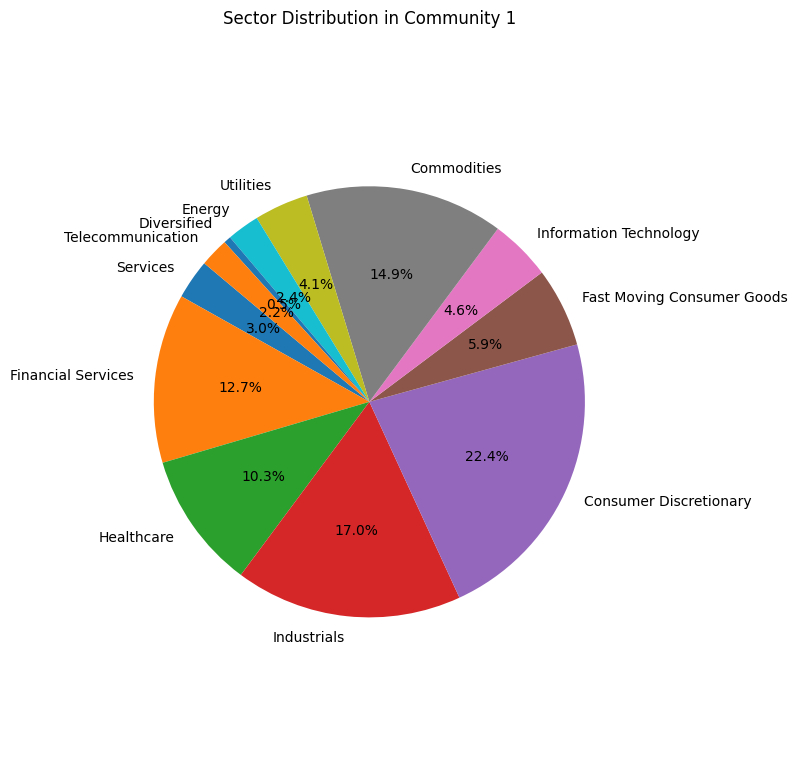


Community 2 (342 nodes): ['Jyoti Resins & Adhesives Ltd,', 'VRL Logistics Limited', 'Spandana Sphoorty Financial Limited', 'KDDL Ltd', 'T.V.Today Network Limited', 'Zydus Wellness Limited', 'Bombay Dyeing & Mfg. Co. Ltd.,', 'Fino Payments Bank Limited', 'BEST AGROLIFE LIMITED', 'State Bank Of India,', 'Supreme Petrochem Ltd.', 'Thirumalai Chemicals Ltd.,', 'Indian Bank', 'Magadh Sugar & Energy Limited', 'Dixon Technologies (India) Limited', 'Shanti Educational Initiatives Limited', 'Nirlon Limited,', 'Symphony Limited', 'Vishnu Chemicals Limited', 'Sical Logistics Limited', 'Antony Waste Handling Cell Limited', 'PRISM JOHNSON LIMITED.', '5paisa Capital Limited', 'Vesuvius India Ltd.', 'Automotive Axles Ltd.,', 'India Cements Ltd.,', 'Blue Cloud Softech Solutions Limited', 'JUPITER WAGONS LIMITED', 'Jamna Auto Industries Ltd.,', 'The Phoenix Mills Ltd.,', 'J.K. CEMENT LTD', 'Hatsun Agro Products Ltd.', 'TVS Srichakra Ltd.,', 'Minda Corporation Limited', 'Prataap Snacks Limited', 'Misht

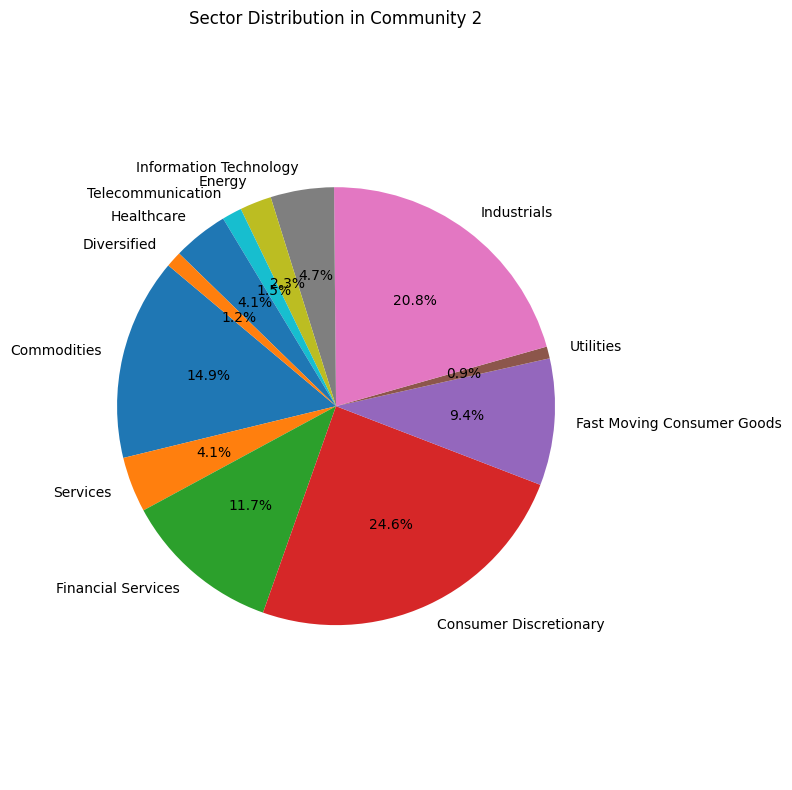


Community 3 (273 nodes): ['Affle (India) Limited', 'WHEELS INDIA LTD', 'AAVAS Financiers Limited', 'Jay Bharat Maruti Ltd.,', 'WAAREE RENEWABLE TECHNOLOGIES LIMITED', 'Dhanuka Agritech Ltd.', 'SML ISUZU LIMITED', 'OLECTRA GREENTECH LIMITED', 'WELSPUN SPECIALTY SOLUTIONS LIMITED', 'HLE GLASCOAT LIMITED', 'Motherson Sumi Wiring India Limited', 'BRIGHTCOM GROUP LIMITED', 'MPS Limited', 'Mafatlal Industries Ltd.,', 'NBCC (India) Limited', 'Mahindra & Mahindra Financial Services Limited', 'Supriya Lifescience Limited', 'Shipping Corporation Of India Ltd', 'KPIT Technologies Ltd', 'Adani Green Energy Limited', 'Shriram Finance Limited', 'Gulshan Polyols Ltd.', 'Jagran Prakashan Limited', 'Gabriel India Ltd.', 'Galaxy Surfactants Limited', 'Mayur Uniquoters ltd.', 'Shankara Building Products Limited', 'SBI Life Insurance Company Limited', 'HCL Technologies Ltd', 'HealthCare Global Enterprises Limited', 'Metropolis Healthcare Limited', 'LTIMindtree Limited', 'Indian Hotels Co. Ltd', 'Century 

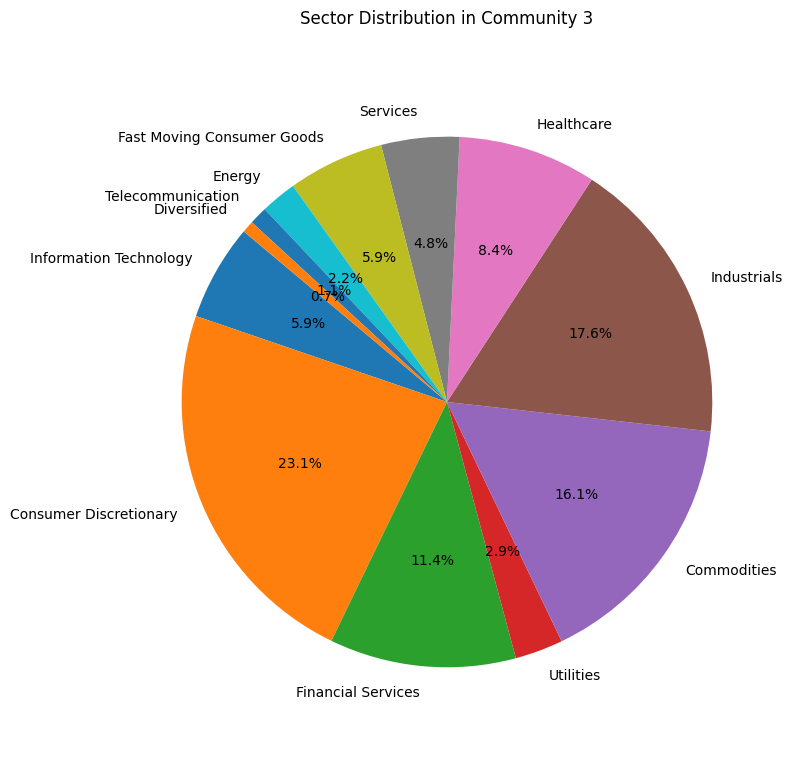


Community 4 (144 nodes): ['Welspun Corp Limited', 'Xchanging Solutions Limited', 'Roto Pumps Ltd.', 'Ami Organics Limited', 'INSOLATION ENERGY LIMITED', 'Raymond Limited', 'Gujarat Ambuja Exports Ltd.', 'Apollo Tyres Ltd', 'Paras Defence and Space Technologies Limited', 'Eureka Forbes Limited', 'Sun Pharmaceutical Industries Ltd.', 'Neogen Chemicals Limited', 'Dredging Corporation of India Ltd.,', 'Varroc Engineering Limited', 'GIC Housing Finance Ltd.', 'Arvind SmartSpaces Limited', 'Kajaria Ceramics Ltd', 'Honeywell Automation India Ltd.', 'MOIL Limited', 'V.S.T.Tillers Tractors Ltd.', 'Dishman Carbogen Amcis Limited', 'ICRA Limited', 'Jindal Saw Ltd.', 'KMC Speciality Hospitals India Limited', 'Sarda Energy & Minerals Ltd', 'Gufic BioSciences Ltd.', 'Precision Wires India ltd.,', 'JSW Holdings Limited', 'Navneet Education Limited', 'Gulf Oil Lubricants India Limited', 'SMC Global Securities Limited', 'Nalwa Sons Investment Ltd', 'Kitex Garmenets Ltd.', 'Taj GVK Hotels & Resorts Ltd

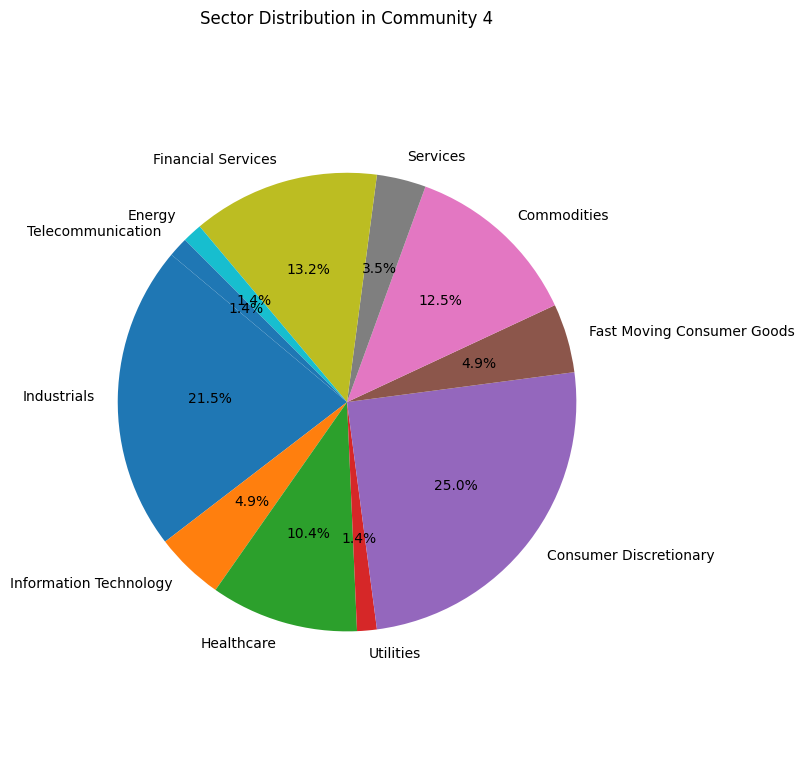


Community 5 (1 nodes): ['Elpro International Ltd.,']
Unique Sectors: {'Consumer Discretionary'}


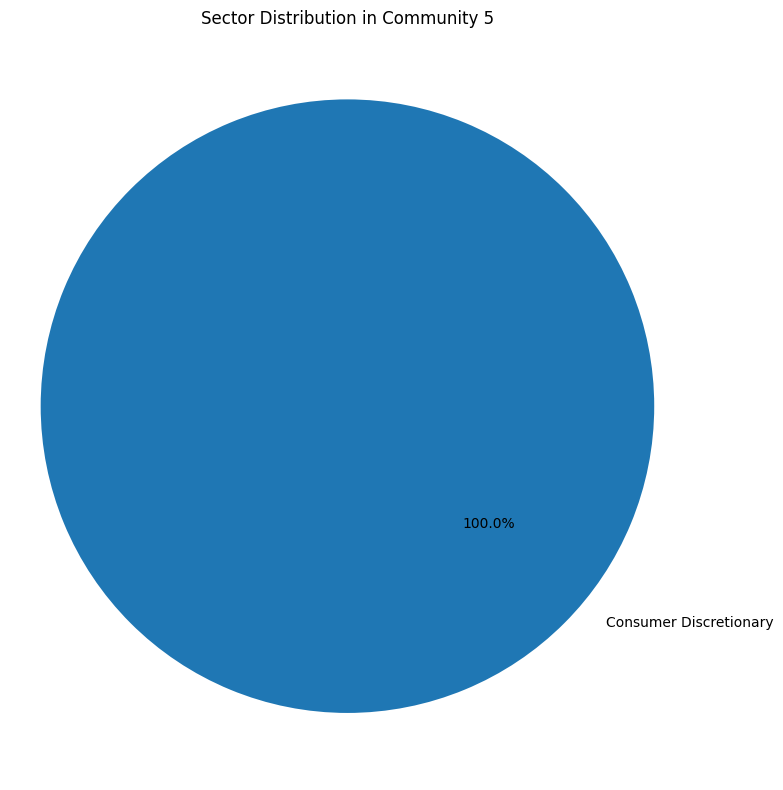


Community 6 (1 nodes): ['PNB Gilts Ltd']
Unique Sectors: {'Financial Services'}


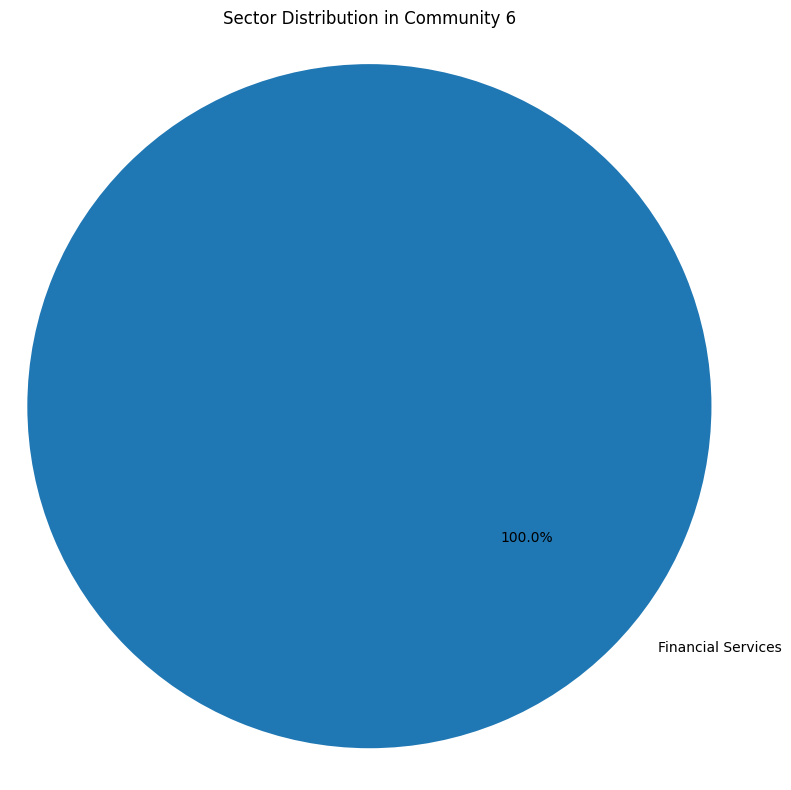


Community 7 (1 nodes): ['Rashtriya Chemicals & Fertilizers Limited']
Unique Sectors: {'Commodities'}


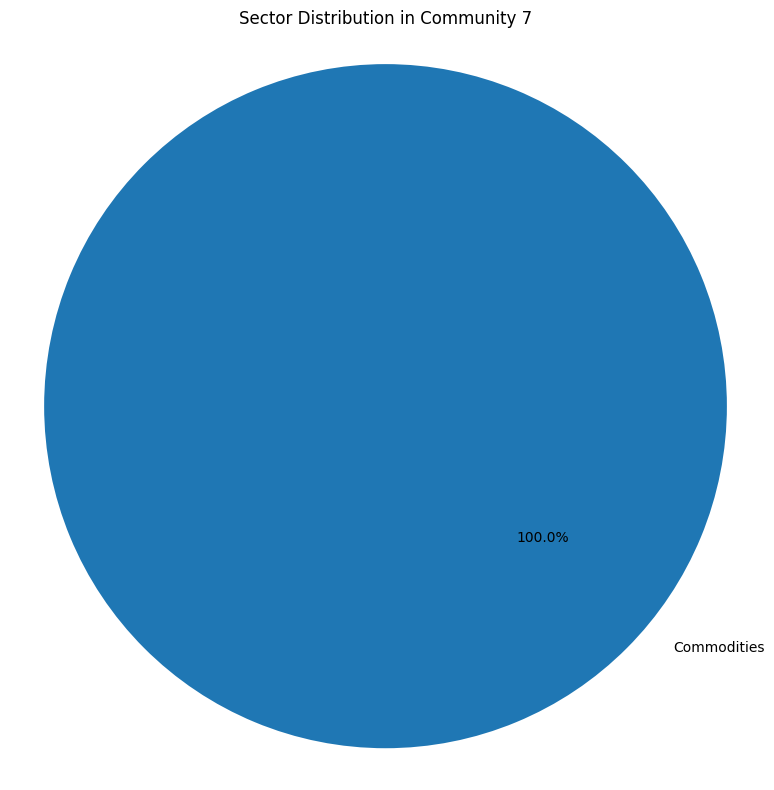

In [ ]:
import matplotlib.pyplot as plt

# Function to find unique sectors within a community
def find_unique_sectors(community):
    unique_sectors = set()
    for comm in list(community):
        sectors = ', '.join(merged_df.loc[merged_df['Issuer Name'] == comm, 'Sector Name'].unique())
        unique_sectors.add(sectors)
    return unique_sectors

# Plot pie charts for sector distribution within each community
for i, community in enumerate(communities):
    unique_sectors = find_unique_sectors(community)
    print(f"Community {i + 1} ({len(community)} nodes): {list(community)}")
    print(f"Unique Sectors: {unique_sectors}")

    # Count occurrences of each sector within the community
    sector_counts = {}
    for comm in list(community):
        sectors = ', '.join(merged_df.loc[merged_df['Issuer Name'] == comm, 'Sector Name'].unique())
        if sectors not in sector_counts:
            sector_counts[sectors] = 1
        else:
            sector_counts[sectors] += 1

    # Plot the pie chart
    plt.figure(figsize=(8,8))
    plt.pie(sector_counts.values(), labels=sector_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Sector Distribution in Community {i + 1}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

    print()


beta measure

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the Sensex dataset
index_data = pd.read_csv('/content/S&P BSE SENSEX data (3).csv')
index_data['Date'] = pd.to_datetime(index_data['Date'])
stock_data = final_data.copy()

In [ ]:
# Define lists to store max and min beta measures and corresponding company names for each community
max_beta_measures = []
max_beta_company_names = []
min_beta_measures = []
min_beta_company_names = []
average_beta_measures = []
# Loop through each community with tqdm for progress bar
for community in communities_l:
    community_beta_measures = []
    community_company_names = []

    # Extract historical market index data
    market_data = index_data.set_index('Date')['Close']

    # Loop through each company in the community
    for company in community:
        # Extract historical stock price data for the company
        company_data = stock_data[stock_data['Issuer Name'] == company].set_index('Date')['Close Price']
        if len(company_data) < 2:
            continue
        # Drop duplicate dates
        company_data = company_data[~company_data.index.duplicated(keep='first')]

        # Combine the data into a DataFrame
        df = pd.DataFrame({'Company': company_data.pct_change(), 'Market': market_data.pct_change()})
        df.dropna(inplace=True)  # Drop rows with NaN values

        # Fit linear regression model
        x = df[['Company']].values.reshape(-1, 1)
        y = df['Market'].values
        model = LinearRegression().fit(x, y)

        # Get beta measure
        beta_measure = model.coef_[0]
        community_beta_measures.append(beta_measure)
        community_company_names.append(company)
    print(f'Beta values for Community {community}: {community_beta_measures}')
    # Calculate average beta measure for the community
    average_beta_measure = np.mean(community_beta_measures)
    average_beta_measures.append(average_beta_measure)
    # Calculate max and min beta measures and corresponding company names for the community
    max_beta = max(community_beta_measures)
    max_beta_idx = community_beta_measures.index(max_beta)
    max_beta_company_name = community_company_names[max_beta_idx]
    min_beta = min(community_beta_measures)
    min_beta_idx = community_beta_measures.index(min_beta)
    min_beta_company_name = community_company_names[min_beta_idx]

    max_beta_measures.append(max_beta)
    max_beta_company_names.append(max_beta_company_name)
    min_beta_measures.append(min_beta)
    min_beta_company_names.append(min_beta_company_name)

    # Print max and min beta values and corresponding company names for the current community
    print(f'Max Beta for Community: {max_beta} (Company: {max_beta_company_name})')
    print(f'Min Beta for Community: {min_beta} (Company: {min_beta_company_name})')


Beta values for Community {'RAGHAV PRODUCTIVITY ENHANCERS LIMITED', 'Tata Teleservices (Maharashtra) Ltd.', 'Eris Lifesciences Limited', 'Kolte-Patil Developers Ltd', 'Ganesha Ecosphere Limited', 'GlaxoSmithkline Pharmaceuticals Ltd.', 'SJVN LIMITED', 'Prudent Corporate Advisory Services Limited', 'PAISALO DIGITAL LIMITED', 'Ratnamani Metals & Tubes Ltd', 'HDFC Asset Management Company Limited', 'Easy Trip Planners Limited', 'Bank Of Baroda', 'Saint-Gobain Sekurit India Ltd.', 'Jindal Drilling & Industries Ltd.,', 'Tarsons Products Limited', 'Jindal Steel & Power Ltd', 'Motilal Oswal Financial Services Limited', 'Voltas Ltd.,', 'NAVA LIMITED', 'Southern Petrochemical Industries Corporation Limited', 'Jammu and Kashmir Bank Ltd.', 'Bayer CropScience Limited.', 'DOLAT ALGOTECH LIMITED', 'Five-Star Business Finance Ltd.', 'Gokul Agro Resources Ltd', 'Balrampur Chini Mills Ltd.', 'Exide Industries Ltd.,', '3M India Ltd.', 'GALLANTT ISPAT LIMITED', 'Laurus Labs Limited', 'BALU FORGE INDUSTR

Beta range for Community 1: (-0.08849954048136673, 0.05373452994041435)
Beta range for Community 2: (-0.09846230617467396, 0.0719406039096293)
Beta range for Community 3: (-0.08998716019331016, 0.06018482418913294)
Beta range for Community 4: (-0.1061406442398075, 0.09349349321449846)
Beta range for Community 5: (0.022864031347289912, 0.022864031347289912)
Beta range for Community 6: (-0.031234669730682153, -0.031234669730682153)
Beta range for Community 7: (-0.021015410872838786, -0.021015410872838786)
Overall Beta range for all communities: (-0.1061406442398075, 0.09349349321449846)
Community 1 Beta Range: 0.14223407042178107
Community 2 Beta Range: 0.17040291008430325
Community 3 Beta Range: 0.1501719843824431
Community 4 Beta Range: 0.19963413745430597
Community 5 Beta Range: 0.0
Community 6 Beta Range: 0.0
Community 7 Beta Range: 0.0


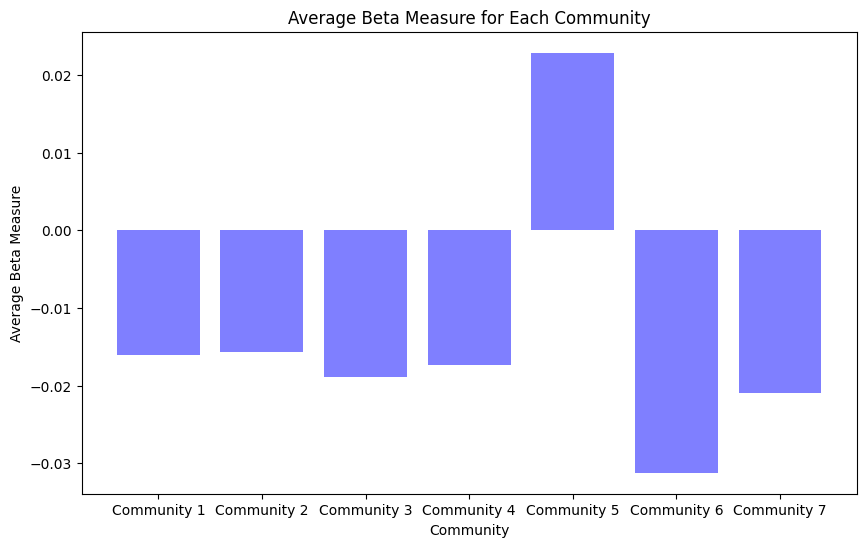

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define lists to store max and min beta measures and corresponding company names for each community
max_beta_measures = []
max_beta_company_names = []
min_beta_measures = []
min_beta_company_names = []
average_beta_measures = []
beta_ranges = []
i = 1

# Loop through each community with tqdm for progress bar
for community in communities_l:
    community_beta_measures = []
    community_company_names = []

    # Extract historical market index data
    market_data = index_data.set_index('Date')['Close']

    # Loop through each company in the community
    for company in community:
        # Extract historical stock price data for the company
        company_data = stock_data[stock_data['Issuer Name'] == company].set_index('Date')['Close Price']

        # Check if there are enough data points for linear regression
        if len(company_data) < 2:
            continue

        # Drop duplicate dates
        company_data = company_data[~company_data.index.duplicated(keep='first')]

        # Combine the data into a DataFrame
        df = pd.DataFrame({'Company': company_data.pct_change(), 'Market': market_data.pct_change()})
        df.dropna(inplace=True)  # Drop rows with NaN values

        # Check if there are enough data points after dropping NaNs
        if len(df) < 2:
            continue

        # Fit linear regression model
        x = df[['Company']].values.reshape(-1, 1)
        y = df['Market'].values
        model = LinearRegression().fit(x, y)

        # Get beta measure
        beta_measure = model.coef_[0]
        community_beta_measures.append(beta_measure)
        community_company_names.append(company)

    # Calculate max and min beta measures for the community
    if community_beta_measures:
        max_beta = max(community_beta_measures)
        min_beta = min(community_beta_measures)

        # Calculate average beta measure for the community
        average_beta_measure = np.mean(community_beta_measures)
        average_beta_measures.append(average_beta_measure)

        # Calculate beta range for the community
        beta_range = max_beta - min_beta
        beta_ranges.append(beta_range)

        # Find the index of max and min beta measures
        max_beta_idx = community_beta_measures.index(max_beta)
        min_beta_idx = community_beta_measures.index(min_beta)

        # Get corresponding company names
        max_beta_company_name = community_company_names[max_beta_idx]
        min_beta_company_name = community_company_names[min_beta_idx]

        # Append to lists
        max_beta_measures.append(max_beta)
        max_beta_company_names.append(max_beta_company_name)
        min_beta_measures.append(min_beta)
        min_beta_company_names.append(min_beta_company_name)

        # Print beta range for the current community
        print(f'Beta range for Community {i}: ({min_beta}, {max_beta})')
        i += 1

# Calculate overall range of beta for all communities
overall_min_beta = min(min_beta_measures)
overall_max_beta = max(max_beta_measures)
overall_beta_range = overall_max_beta - overall_min_beta

# Print overall beta range for all communities
print(f'Overall Beta range for all communities: ({overall_min_beta}, {overall_max_beta})')

# Print beta ranges for each community
for i, r in enumerate(beta_ranges):
    print(f'Community {i+1} Beta Range: {r}')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities_l)), average_beta_measures, color='blue', alpha=0.5)
plt.xlabel('Community')
plt.ylabel('Average Beta Measure')
plt.title('Average Beta Measure for Each Community')
plt.xticks(range(len(communities_l)), [f'Community {i+1}' for i in range(len(communities_l))])
plt.show()


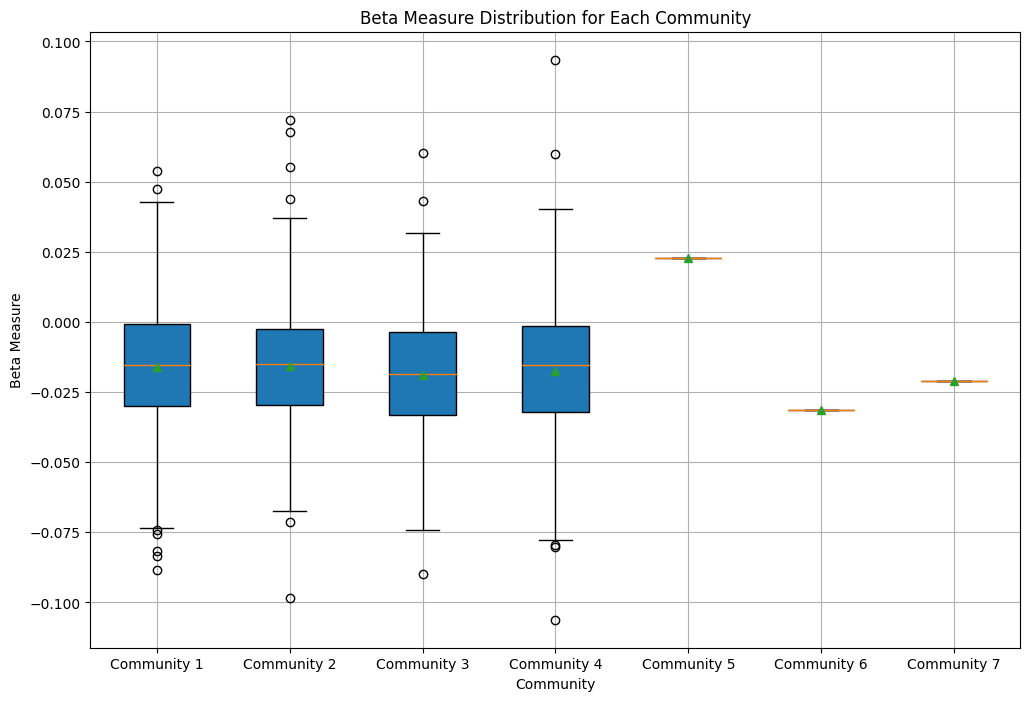

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize list to store beta measures for each community
beta_measures_per_community = []

# Loop through each community
for community in communities_l:
    community_beta_measures = []

    # Extract historical market index data
    market_data = index_data.set_index('Date')['Close']

    # Loop through each company in the community
    for company in community:
        # Extract historical stock price data for the company
        company_data = stock_data[stock_data['Issuer Name'] == company].set_index('Date')['Close Price']

        # Check if there are enough data points for linear regression
        if len(company_data) < 2:
            continue

        # Drop duplicate dates
        company_data = company_data[~company_data.index.duplicated(keep='first')]

        # Combine the data into a DataFrame
        df = pd.DataFrame({'Company': company_data.pct_change(), 'Market': market_data.pct_change()})
        df.dropna(inplace=True)  # Drop rows with NaN values

        # Check if there are enough data points after dropping NaNs
        if len(df) < 2:
            continue

        # Fit linear regression model
        x = df[['Company']].values.reshape(-1, 1)
        y = df['Market'].values
        model = LinearRegression().fit(x, y)

        # Get beta measure
        beta_measure = model.coef_[0]
        community_beta_measures.append(beta_measure)

    # Append beta measures for the current community to the list
    beta_measures_per_community.append(community_beta_measures)

# Plot box plots for beta measures of each community
plt.figure(figsize=(12, 8))
plt.boxplot(beta_measures_per_community, patch_artist=True, showmeans=True)
plt.xlabel('Community')
plt.ylabel('Beta Measure')
plt.title('Beta Measure Distribution for Each Community')
plt.xticks(range(1, len(beta_measures_per_community) + 1), [f'Community {i+1}' for i in range(len(beta_measures_per_community))])
plt.grid(True)
plt.show()


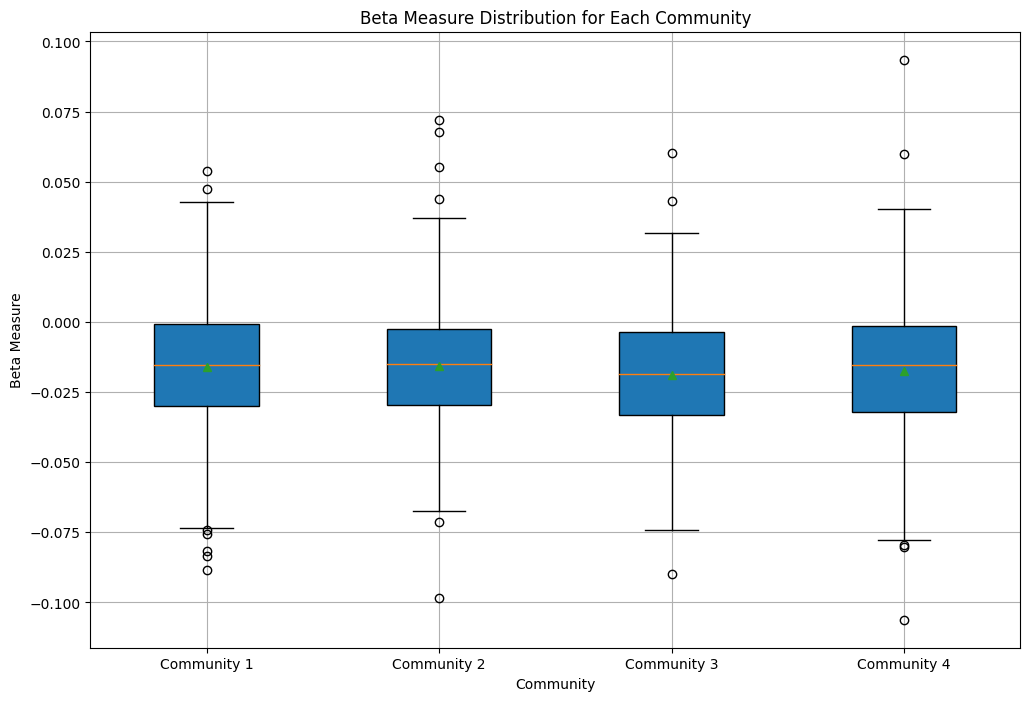

In [ ]:
# Plot box plots for beta measures of each community
plt.figure(figsize=(12, 8))
plt.boxplot(beta_measures_per_community[:4], patch_artist=True, showmeans=True)
plt.xlabel('Community')
plt.ylabel('Beta Measure')
plt.title('Beta Measure Distribution for Each Community')
plt.xticks(range(1, 5), [f'Community {i+1}' for i in range(4)])
plt.grid(True)
plt.show()


In [ ]:
non_overlapping_communities = nx.community.louvain_communities(G)
communities_l = list(non_overlapping_communities)
# Initialize a dictionary to store overlapping communities
overlapping_communities = {}

# Iterate through pairs of communities
for i, community1 in enumerate(non_overlapping_communities):
    for j, community2 in enumerate(non_overlapping_communities):
        if i != j:  # Avoid comparing a community with itself
            # Find overlapping nodes between community1 and community2
            overlapping_nodes = set(community1).intersection(community2)
            if overlapping_nodes:
                # Add overlapping nodes to overlapping communities
                overlapping_communities[f"Overlap {i+1}-{j+1}"] = list(overlapping_nodes)

# Print overlapping communities
for overlap_id, overlap_nodes in overlapping_communities.items():
    print(f"Overlapping Community {overlap_id}: {overlap_nodes}")


In [ ]:
for i, community1 in enumerate(non_overlapping_communities):
  print(i,len(community1))

0 334
1 319
2 112
3 368


In [ ]:
import networkx as nx
from networkx.algorithms import community

def louvain_fuzzy(G):
    # First, initialize each node with equal membership scores for all communities
    initial_membership = {node: {node} for node in G.nodes()}

    # Perform Louvain community detection
    communities_generator = nx.community.louvain_communities(G)

    # Convert the generator to a list of communities
    communities = list(communities_generator)

    # Assign membership scores to nodes based on the detected communities
    membership_scores = {node: {i: 0 for i in range(len(communities))} for node in G.nodes()}
    for i, community in enumerate(communities):
        for node in community:
            membership_scores[node][i] = 1

    return communities, membership_scores

communities, membership_scores = louvain_fuzzy(G)

# Print fuzzy communities
for i, community in enumerate(communities):
    print("Community", i+1, ":")
    for node in community:
        print("Node:", node, "Membership Scores:", membership_scores[node])
    print()


Community 1 :
Node: Medplus Health Services Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Amber Enterprises India Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Meghmani Organics Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: UTI Asset Management Company Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Power Mech Projects Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Chambal Fertilisers & Chemicals Ltd Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Shoppers Stop Ltd Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Linde India Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Alkem Laboratories Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Siemens Ltd., Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Lloyds Metals and Energy Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: GFL LIMITED Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Force Motors Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}


In [ ]:
for community_idx, community in enumerate(communities_l):
  print(community_idx)

0
1
2
3
4
5
6


In [ ]:
# Example code assuming you're using NetworkX for graph operations
import networkx as nx

# 2. Calculate degree for nodes
degrees = dict(G.degree())

# 3. Group nodes by community
nodes_by_community = {}
for i, community in enumerate(communities):
    for node in community:
        if i not in nodes_by_community:
            nodes_by_community[i] = []
        nodes_by_community[i].append(node)

# 4. Calculate degree range for each community
degree_ranges = {}
for community_id, nodes in nodes_by_community.items():
    community_degrees = [degrees[node] for node in nodes]
    min_degree = min(community_degrees)
    max_degree = max(community_degrees)
    degree_ranges[community_id] = (min_degree, max_degree)

# 5. Output degree ranges for all communities
for community_id, degree_range in degree_ranges.items():
    print(f"Community {community_id}: Degree range {degree_range}")


Community 0: Degree range (5, 338)
Community 1: Degree range (227, 494)
Community 2: Degree range (19, 485)
Community 3: Degree range (38, 137)
Community 4: Degree range (2, 2)
Community 5: Degree range (2, 2)
Community 6: Degree range (2, 2)


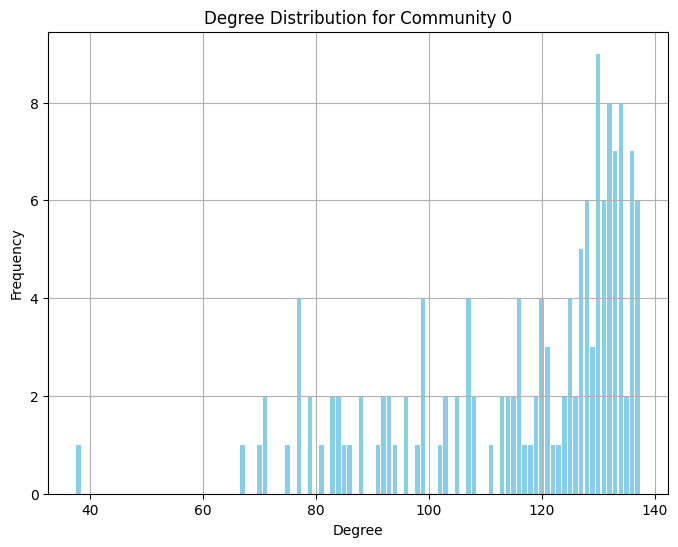

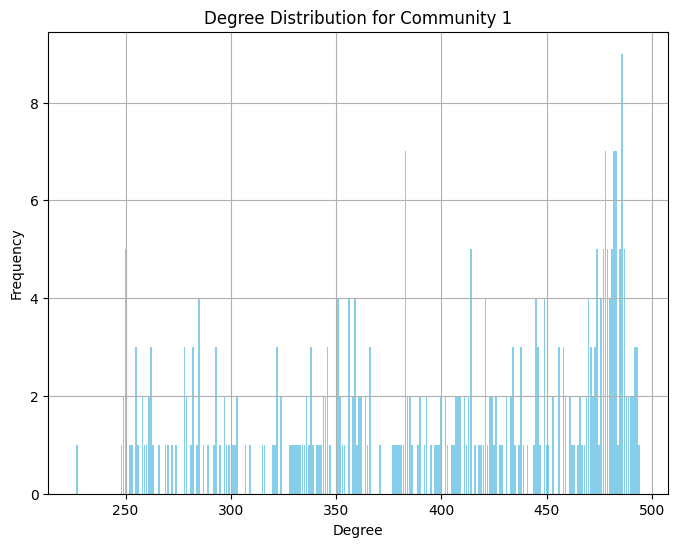

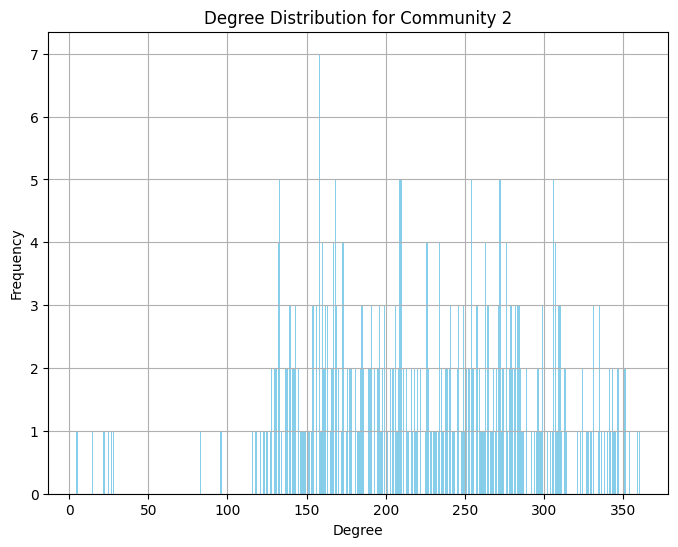

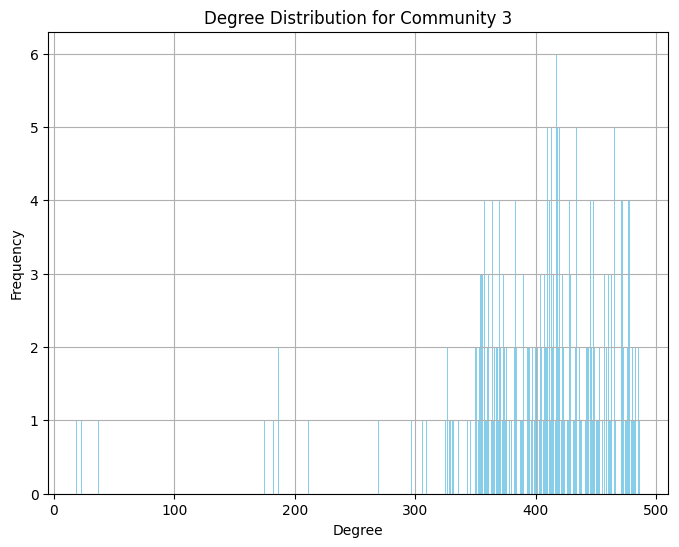

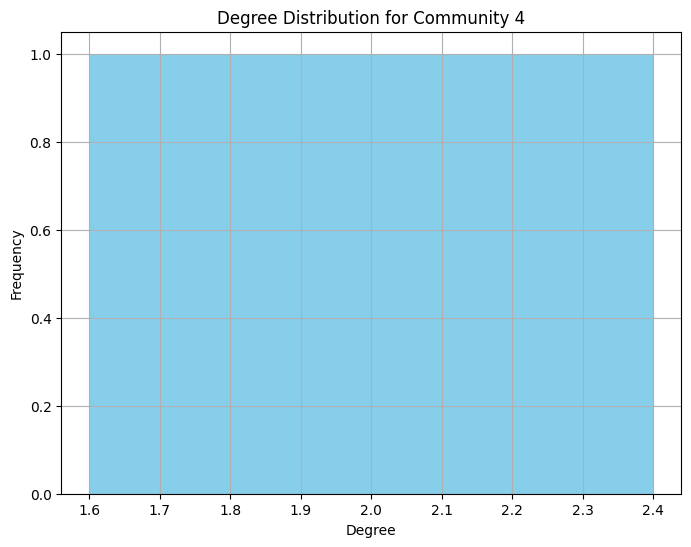

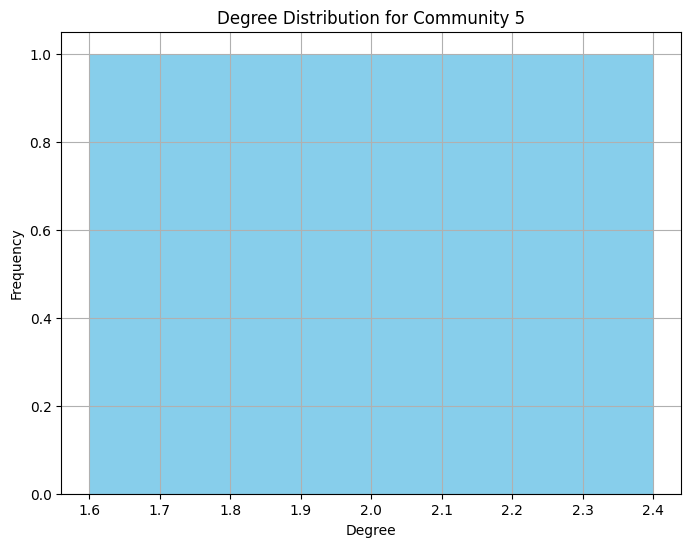

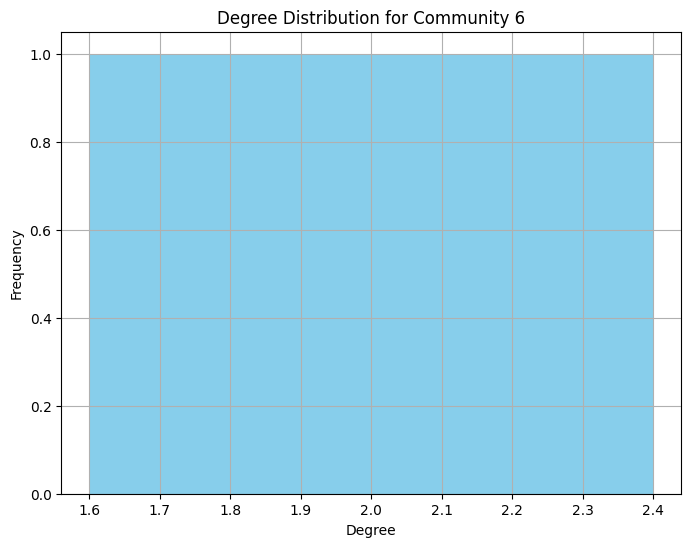

In [ ]:
import matplotlib.pyplot as plt

# Plot degree distribution for each community
for community_id, degree_distribution in degree_distributions.items():
    plt.figure(figsize=(8, 6))
    plt.bar(degree_distribution.keys(), degree_distribution.values(), color='skyblue')
    plt.title(f'Degree Distribution for Community {community_id}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
# Calculate network science parameters for each community

# 1. Average Degree
average_degrees = {}
for community_id, nodes in nodes_by_community.items():
    community_degrees = [degrees[node] for node in nodes]
    average_degree = sum(community_degrees) / len(community_degrees)
    average_degrees[community_id] = average_degree

# 2. Density
densities = {}
for community_id, nodes in nodes_by_community.items():
    community_subgraph = G.subgraph(nodes)
    density = nx.density(community_subgraph)
    densities[community_id] = density

# 3. Average Shortest Path Length
average_shortest_paths = {}
for community_id, nodes in nodes_by_community.items():
    community_subgraph = G.subgraph(nodes)
    avg_shortest_path = nx.average_shortest_path_length(community_subgraph)
    average_shortest_paths[community_id] = avg_shortest_path

# 4. Clustering Coefficient
clustering_coefficients = {}
for community_id, nodes in nodes_by_community.items():
    community_subgraph = G.subgraph(nodes)
    clustering_coefficient = nx.average_clustering(community_subgraph)
    clustering_coefficients[community_id] = clustering_coefficient

# 5. Degree Centrality
degree_centralities = {}
for community_id, nodes in nodes_by_community.items():
    community_subgraph = G.subgraph(nodes)
    degree_centrality = nx.degree_centrality(community_subgraph)
    avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
    degree_centralities[community_id] = avg_degree_centrality

# Output the results
for community_id in nodes_by_community:
    print(f"Community {community_id}:")
    print(f"    Average Degree: {average_degrees.get(community_id)}")
    print(f"    Density: {densities.get(community_id)}")
    print(f"    Average Shortest Path Length: {average_shortest_paths.get(community_id)}")
    print(f"    Clustering Coefficient: {clustering_coefficients.get(community_id)}")
    print(f"    Degree Centrality: {degree_centralities.get(community_id)}")

# Calculate ranges for network science parameters within each community

# Initialize dictionaries to store ranges for each parameter within each community
degree_range_per_community = {}
density_range_per_community = {}
avg_shortest_path_range_per_community = {}
clustering_coefficient_range_per_community = {}
degree_centrality_range_per_community = {}

# Calculate ranges for each parameter within each community
for community_id, nodes in nodes_by_community.items():
    # 1. Average Degree
    community_degrees = [degrees[node] for node in nodes]
    min_avg_degree = min(community_degrees)
    max_avg_degree = max(community_degrees)
    degree_range_per_community[community_id] = (min_avg_degree, max_avg_degree)

    # 2. Density
    community_subgraph = G.subgraph(nodes)
    density = nx.density(community_subgraph)
    density_range_per_community[community_id] = (density, density)

    # 3. Average Shortest Path Length
    avg_shortest_path = nx.average_shortest_path_length(community_subgraph)
    avg_shortest_path_range_per_community[community_id] = (avg_shortest_path, avg_shortest_path)

    # 4. Clustering Coefficient
    clustering_coefficient = nx.average_clustering(community_subgraph)
    clustering_coefficient_range_per_community[community_id] = (clustering_coefficient, clustering_coefficient)

    # 5. Degree Centrality
    degree_centrality = nx.degree_centrality(community_subgraph)
    avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
    degree_centrality_range_per_community[community_id] = (avg_degree_centrality, avg_degree_centrality)

# Output the ranges for each parameter within each community
print("Ranges for network science parameters within each community:")
for community_id in nodes_by_community:
    print(f"Community {community_id}:")
    print(f"    Average Degree: {degree_range_per_community[community_id]}")
    print(f"    Density: {density_range_per_community[community_id]}")
    print(f"    Average Shortest Path Length: {avg_shortest_path_range_per_community[community_id]}")
    print(f"    Clustering Coefficient: {clustering_coefficient_range_per_community[community_id]}")
    print(f"    Degree Centrality: {degree_centrality_range_per_community[community_id]}")


Community 0:
    Average Degree: 219.9546827794562
    Density: 0.5375812505721871
    Average Shortest Path Length: 1.581213952210931
    Clustering Coefficient: 0.8354182038516399
    Degree Centrality: 0.5375812505721874
Community 1:
    Average Degree: 399.4741379310345
    Density: 0.9203020967902216
    Average Shortest Path Length: 1.0854615919705852
    Clustering Coefficient: 0.9446475758157983
    Degree Centrality: 0.9203020967902189
Community 2:
    Average Degree: 395.20068027210885
    Density: 0.8835875647187202
    Average Shortest Path Length: 1.124097420538181
    Clustering Coefficient: 0.9319095920825577
    Degree Centrality: 0.8835875647187205
Community 3:
    Average Degree: 116.73717948717949
    Density: 0.6747725392886683
    Average Shortest Path Length: 1.360628618693135
    Clustering Coefficient: 0.8530529958131359
    Degree Centrality: 0.6747725392886685
Community 4:
    Average Degree: 2.0
    Density: 0
    Average Shortest Path Length: 0
    Clusterin

21 feature vector

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def calculate_technical_indicators(df):
    # Moving Averages
    tqdm.pandas(desc="Calculating SMA_50")
    df['SMA_50'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.rolling(window=50).mean())

    tqdm.pandas(desc="Calculating SMA_200")
    df['SMA_200'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.rolling(window=200).mean())

    # Exponential Moving Average (EMA)
    tqdm.pandas(desc="Calculating EMA_12")
    df['EMA_12'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.ewm(span=12, min_periods=12).mean())

    tqdm.pandas(desc="Calculating EMA_26")
    df['EMA_26'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.ewm(span=26, min_periods=26).mean())

    # Relative Strength Index (RSI)
    tqdm.pandas(desc="Calculating RSI")
    delta = df.groupby('Issuer Name')['Close Price'].diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Moving Average Convergence Divergence (MACD)
    tqdm.pandas(desc="Calculating MACD")
    df['EMA_12'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.ewm(span=12, min_periods=12).mean())
    df['EMA_26'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.ewm(span=26, min_periods=26).mean())
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df.groupby('Issuer Name')['MACD'].progress_transform(lambda x: x.ewm(span=9, min_periods=9).mean())
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

    # Bollinger Bands
    tqdm.pandas(desc="Calculating Bollinger Bands")
    window = 20
    df['Middle_Band'] = df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.rolling(window=window).mean())
    df['Upper_Band'] = df['Middle_Band'] + 2 * df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.rolling(window=window).std())
    df['Lower_Band'] = df['Middle_Band'] - 2 * df.groupby('Issuer Name')['Close Price'].progress_transform(lambda x: x.rolling(window=window).std())

    # Average True Range (ATR)
    tqdm.pandas(desc="Calculating ATR")
    df['High_Low'] = df['High Price'] - df['Low Price']
    df['High_PreviousClose'] = abs(df['High Price'] - df['Close Price'].shift(1))
    df['Low_PreviousClose'] = abs(df['Low Price'] - df['Close Price'].shift(1))
    df['True_Range'] = df[['High_Low', 'High_PreviousClose', 'Low_PreviousClose']].max(axis=1)
    df['ATR'] = df.groupby('Issuer Name')['True_Range'].transform(lambda x: x.rolling(window=14, min_periods=1).mean())

    # VWAP (Volume Weighted Average Price)
    tqdm.pandas(desc="Calculating VWAP")
    df['VWAP'] = (df['Total Turnover (Rs.)'] / df['No.of Shares']).groupby(df['Issuer Name']).cumsum() / df['No.of Shares'].groupby(df['Issuer Name']).cumsum()

    # Money Flow Index (MFI)
    tqdm.pandas(desc="Calculating MFI")
    typical_price = (df['High Price'] + df['Low Price'] + df['Close Price']) / 3
    raw_money_flow = typical_price * df['No.of Shares']
    df['Money_Flow'] = (raw_money_flow * df['Close Price'].diff()).groupby(df['Issuer Name']).cumsum()
    positive_money_flow = df['Money_Flow'].where(df['Money_Flow'] > 0, 0)
    negative_money_flow = df['Money_Flow'].where(df['Money_Flow'] < 0, 0).abs()
    positive_money_flow_avg = positive_money_flow.rolling(window=14).mean()
    negative_money_flow_avg = negative_money_flow.rolling(window=14).mean()
    money_flow_ratio = positive_money_flow_avg / negative_money_flow_avg
    df['MFI'] = 100 - (100 / (1 + money_flow_ratio))

    # On-Balance Volume (OBV)
    tqdm.pandas(desc="Calculating OBV")
    df['OBV'] = df.groupby('Issuer Name')['No.of Shares'].cumsum()

    # Accumulation/Distribution Line (ADL)
    tqdm.pandas(desc="Calculating ADL")
    adl_multiplier = ((df['Close Price'] - df['Low Price']) - (df['High Price'] - df['Close Price'])) / (df['High Price'] - df['Low Price'])
    df['ADL'] = adl_multiplier * df['No.of Shares'] + df['No.of Shares'].groupby(df['Issuer Name']).shift(1).fillna(0).cumsum()

    return df

# Call the function to calculate technical indicators
final_data = calculate_technical_indicators(final_data)


Calculating Bollinger Bands: 100%|██████████| 1132/1132 [00:00<00:00, 1978.10it/s]


<ipython-input-13-4495166e768a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_subset.dropna(inplace=True)


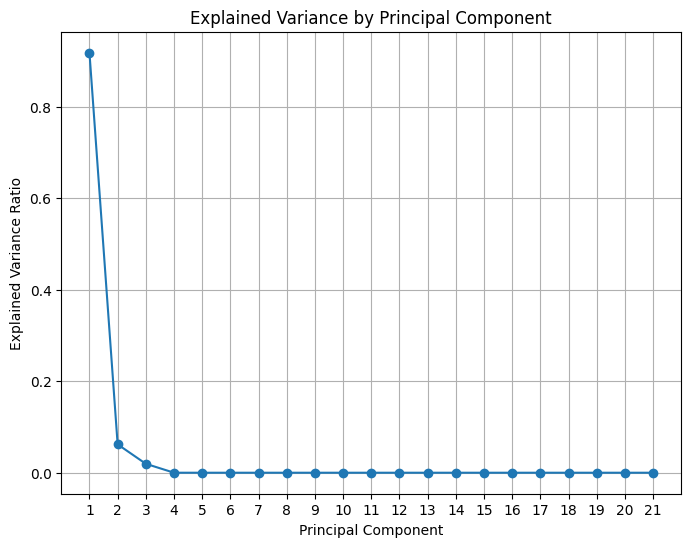

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select relevant columns excluding non-numeric columns
selected_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6','SMA_50', 'EMA_12', 'EMA_26', 'RSI', 'MACD_Histogram', 'Middle_Band', 'Upper_Band', 'Lower_Band', 'ATR', 'VWAP', 'MFI', 'OBV', 'ADL','Total Turnover (Rs.)','Beta']
result_subset = merged_df[selected_columns]
# Drop rows with missing values
result_subset.dropna(inplace=True)
df = pd.DataFrame(result_subset)

# Perform PCA
pca = PCA()
pca.fit(df)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


In [ ]:
#CALCULATING ADJ MATRIX ON PCA VECTORS.
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Group by 'Issuer Name'
grouped_data = pca_data.groupby('Issuer Name')

# Create a DataFrame to store cosine similarity values
correlation_matrix_pca = pd.DataFrame(index=pca_data['Issuer Name'].unique(), columns=pca_data['Issuer Name'].unique())

# Compute the similarity between companies based on overlapping dates
for issuer_name1, group1 in tqdm(grouped_data, desc="Computing Similarity"):
    for issuer_name2, group2 in grouped_data:
        if issuer_name1 != issuer_name2:  # Exclude self-comparison
            # Find overlapping dates between two companies
            overlapping_dates = pd.merge(group1, group2, on='Date', how='inner')['Date']

            # Filter data for overlapping dates
            group1_overlap = group1[group1['Date'].isin(overlapping_dates)].iloc[:, 2:].dropna().values
            group2_overlap = group2[group2['Date'].isin(overlapping_dates)].iloc[:, 2:].dropna().values

            if len(group1_overlap) > 0 and len(group2_overlap) > 0:  # Check if there are non-empty overlap
                # Calculate cosine similarity between feature vectors
                similarity_matrix = cosine_similarity(group1_overlap, group2_overlap)

                # Average similarity across all dates
                avg_similarity = similarity_matrix.mean()

                # Update the corresponding cell in the correlation_matrix_pca DataFrame
                correlation_matrix_pca.at[issuer_name1, issuer_name2] = avg_similarity

# Save the result to CSV
correlation_matrix_pca.to_csv('correlation_matrix_pca.csv')


Computing Similarity: 100%|██████████| 1132/1132 [5:05:38<00:00, 16.20s/it]


Sharpe Ratio

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Assuming final_data is your DataFrame containing the provided information
# Calculate daily returns
final_data['Daily Return'] = final_data.groupby('Issuer Name')['Close Price'].pct_change(1)

# Initialize a dictionary to store Sharpe Ratios for each Issuer Name
sharpe_ratios = {}
unique_issuers = final_data['Issuer Name'].unique()

# Iterate over unique Issuer Names with tqdm
for issuer_name in tqdm(unique_issuers, desc="Calculating Sharpe Ratios"):
    group_data = final_data[final_data['Issuer Name'] == issuer_name]

    # Get the number of trading days for the company
    trading_days = group_data.shape[0]

    # Calculate company-specific risk-free rate
    risk_free_rate_annual = 0.5  # 5% annual risk-free rate in India
    risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/trading_days) - 1

    # Calculate Sharpe Ratio
    sharpe_ratio = (group_data['Daily Return'].mean() - risk_free_rate_daily) / group_data['Daily Return'].std()

    # Calculate company-specific annualized Sharpe Ratio
    company_specific_sharpe_ratio = sharpe_ratio * np.sqrt(trading_days)
    if(company_specific_sharpe_ratio<0):
        company_specific_sharpe_ratio=company_specific_sharpe_ratio*company_specific_sharpe_ratio

    # Store Sharpe Ratio for the Issuer Name
    sharpe_ratios[issuer_name] = company_specific_sharpe_ratio

# Convert the dictionary to a DataFrame for easier analysis
sharpe_ratios_df = pd.DataFrame(list(sharpe_ratios.items()), columns=['Issuer Name', 'Sharpe Ratio'])

# Print or further process the Sharpe Ratios DataFrame
print(sharpe_ratios_df)

Calculating Sharpe Ratios: 100%|████████████████████████████████████████████████████████████████| 1132/1132 [02:09<00:00,  8.73it/s]

                        Issuer Name  Sharpe Ratio
0              Gland Pharma Limited      0.229344
1               360 ONE WAM LIMITED      0.838178
2                     3M India Ltd.      0.228847
3            5paisa Capital Limited      0.440658
4     63 Moons Technologies Limited      0.021156
...                             ...           ...
1127     Zydus Lifesciences Limited      0.333736
1128         Zydus Wellness Limited      0.494261
1129        eClerx Services Limited      0.039200
1130                eMudhra Limited      0.238974
1131       ramkrishna forgings Ltd.      0.856050

[1132 rows x 2 columns]


In [ ]:
sharpe_ratios_df.to_csv('sharpe_ratio_updtes.csv',index=False)

Combined centrality

In [ ]:
import networkx as nx
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define a function to calculate combined centrality score, Sharpe ratio, and returns for each node
def combined_centrality(graph, node):
    closeness = nx.closeness_centrality(graph)[node]
    betweenness = nx.betweenness_centrality(graph)[node]
    eigenvector = nx.eigenvector_centrality(graph)[node]

    # Combine centralities and Sharpe ratio
    combined_score = (closeness / 3) + (betweenness / 3) + (eigenvector / 3)

    return combined_score, closeness, betweenness, eigenvector

def combined_centrality_alpha(graph, node, a1, a2, a3):
    closeness = nx.closeness_centrality(graph)[node]
    betweenness = nx.betweenness_centrality(graph)[node]
    eigenvector = nx.eigenvector_centrality(graph)[node]

    # Compute combined centrality score using given coefficients
    combined_score = a1 * closeness + a2 * betweenness + a3 * eigenvector

    return combined_score, closeness, betweenness, eigenvector

# Function to optimize alpha values
def optimize_alphas(SR, Cc, Cb, Ce):
    # Objective function
    def objective(x):
        return -SR * (x[0] * Cc + x[1] * Cb + x[2] * Ce)

    # Constraint function - sum of alphas should be equal to 1
    def constraint(x):
        return sum(x) - 1

    # Initial guess for alpha values
    initial_guess = [0.33, 0.33, 0.34]  # Example initial guess

    # Define bounds for alpha values (0 <= alpha <= 1)
    bounds = [(0, 1), (0, 1), (0, 1)]

    # Define the constraint
    cons = {'type': 'eq', 'fun': constraint}

    # Perform optimization
    result = minimize(objective, initial_guess, bounds=bounds, constraints=cons)

    # Extract the optimized alpha values
    alpha_values = result.x

    return alpha_values

# Load the DataFrame containing Sharpe ratios
sharpe_ratios_df = pd.read_csv("sharpe_ratio_updtes.csv")
risk_free_rate = 0.01  # Example: 1% annually
# Iterate over each subcommunity with tqdm
for community_idx, community in enumerate(tqdm(communities_l, desc="Processing Communities")):
    # Create a subgraph for the current subcommunity
    subgraph = G.subgraph(community)
    nodes_data = []
    min_node = None
    min_combined_score = -float('inf')  # Initialize maximum combined score to negative infinity
    min_closeness = 0
    min_betweenness = 0
    min_eigenvector = 0
    min_sharpe_ratio = 0

    # Compute combined centrality score, Sharpe ratio, returns, closeness, betweenness, and eigenvector centrality for each node
    for node in tqdm(subgraph.nodes(), desc=f"Processing Community {community_idx + 1} Nodes", leave=False):
        combined_score, closeness, betweenness, eigenvector = combined_centrality(subgraph, node)
        sharpe_ratio = sharpe_ratios_df.loc[sharpe_ratios_df['Issuer Name'] == node, 'Sharpe Ratio'].values[0]

        # Update min_node and min_combined_score if the current node has a lower combined score
        if combined_score < min_combined_score:
            min_node = node
            min_combined_score = combined_score
            min_sharpe_ratio = sharpe_ratio
            min_closeness = closeness
            min_betweenness = betweenness
            min_eigenvector = eigenvector

    # Get SP (Sharpe Ratio) for the current community
    # sharpe_ratio = sharpe_ratios_df.loc[sharpe_ratios_df['Issuer Name'] == community, 'Sharpe Ratio'].values[0]

    alpha_values = optimize_alphas(min_sharpe_ratio, min_closeness, min_betweenness, min_eigenvector)
    a1 = alpha_values[0]
    a2 = alpha_values[1]
    a3 = alpha_values[2]

    min_node = None
    min_combined_score = float('inf')  # Initialize minimum combined score to positive infinity
    min_closeness = None
    min_betweenness = None
    min_eigenvector = None

    # Compute combined centrality score for each node in the subcommunity
    for node in tqdm(subgraph.nodes(), desc=f"Processing alpha Community {community_idx + 1} Nodes", leave=False):
        combined_score, closeness, betweenness, eigenvector = combined_centrality_alpha(subgraph, node, a1, a2, a3)
        sharpe_ratio = sharpe_ratios_df.loc[sharpe_ratios_df['Issuer Name'] == node, 'Sharpe Ratio'].values[0]

        # Update min_node and min_combined_score if the current node has a lower combined score
        if sharpe_ratio * combined_score < sharpe_ratio * min_combined_score:
            min_node = node
            min_combined_score = combined_score
            min_closeness = closeness
            min_betweenness = betweenness
            min_eigenvector = eigenvector
        nodes_data.append((node, combined_score, sharpe_ratio, closeness, betweenness, eigenvector))


    # Print the metrics for the node with the least combined centrality score in the subcommunity
    print(f"Node with the least combined centrality score in Community {community_idx + 1}:")
    print(f"Node: {min_node}")
    print(f"Combined Centrality Score: {min_combined_score}")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    print(f"Closeness Centrality: {min_closeness}")
    print(f"Betweenness Centrality: {min_betweenness}")
    print(f"Eigenvector Centrality: {min_eigenvector}")
    nodes_df = pd.DataFrame(nodes_data, columns=['Node', 'Combined Score', 'Sharpe Ratio', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality'])

    # Sort DataFrame by combined score in descending order
    nodes_df = nodes_df.sort_values(by='Combined Score', ascending=False)

    # Write DataFrame to CSV
    nodes_df.to_csv(f'community_{community_idx + 1}_centrality_metric_updates.csv', index=False)


Processing Community 1 Nodes:  18%|███████████▏                                                  | 58/320 [39:22<2:54:44, 40.02s/it]


Processing Community 1 Nodes:  30%|█████████████████▊                                          | 95/320 [1:05:11<3:06:45, 49.80s/it]

Distribution of centrality in community

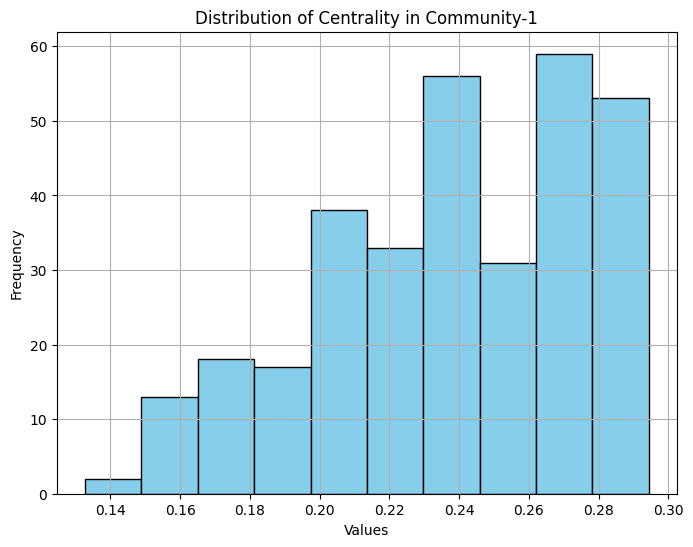

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_1_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


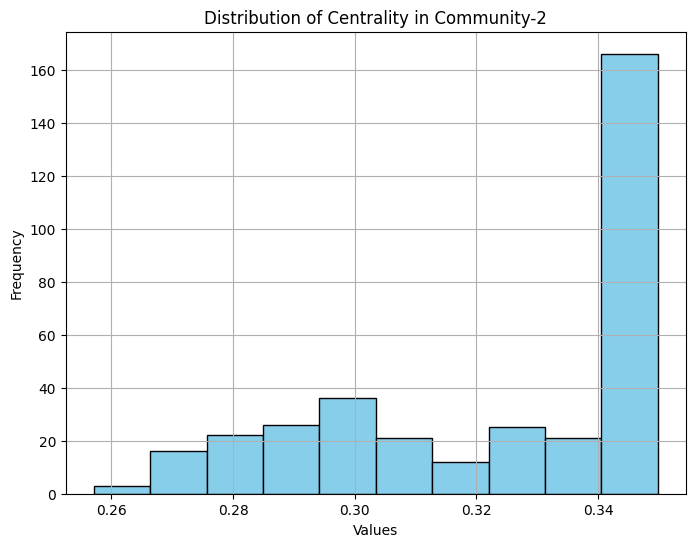

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_2_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-2')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


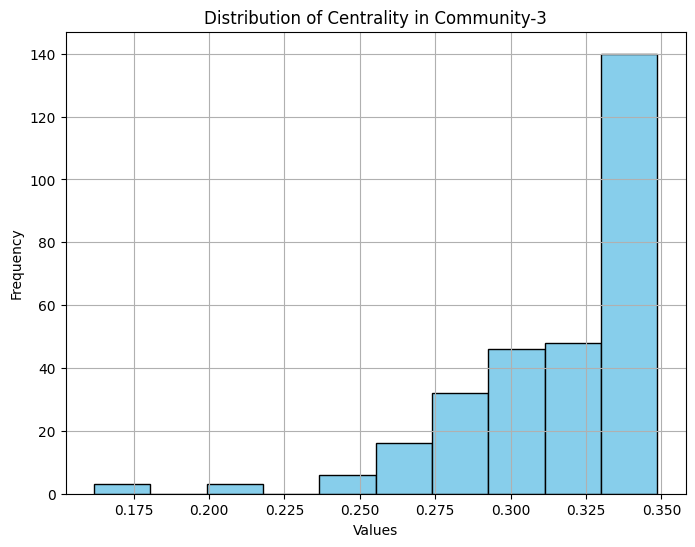

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_3_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-3')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


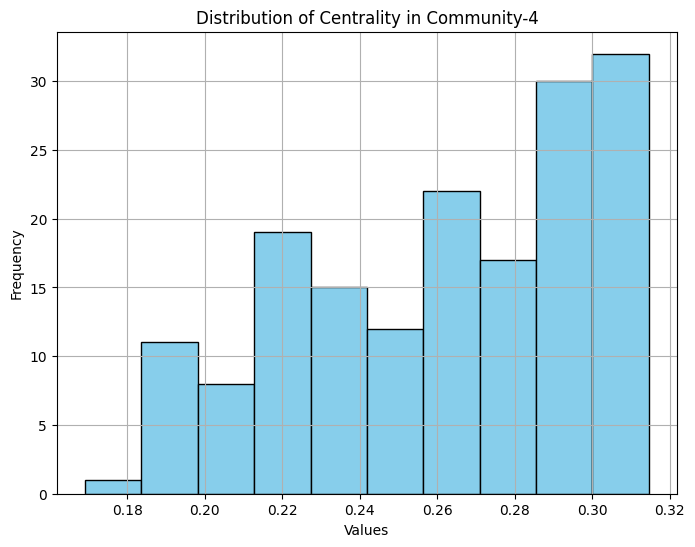

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_4_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-4')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


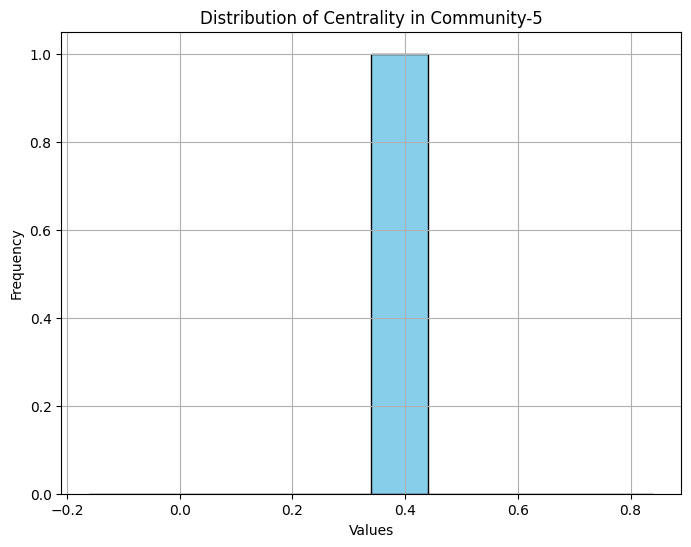

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_5_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-5')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


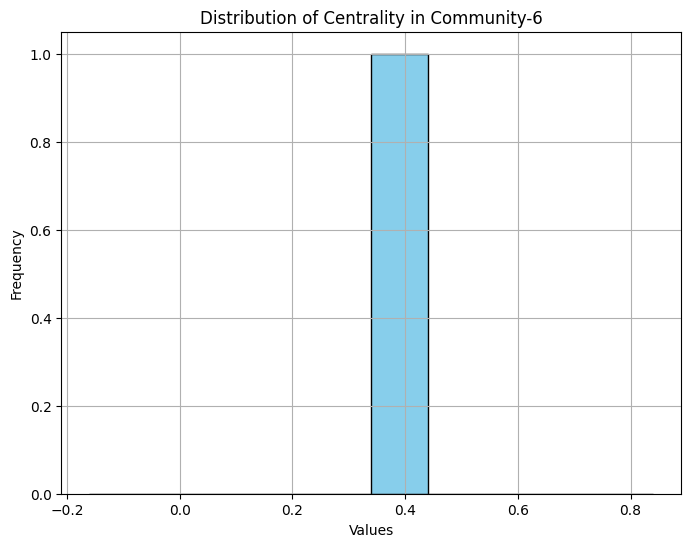

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_6_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-6')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


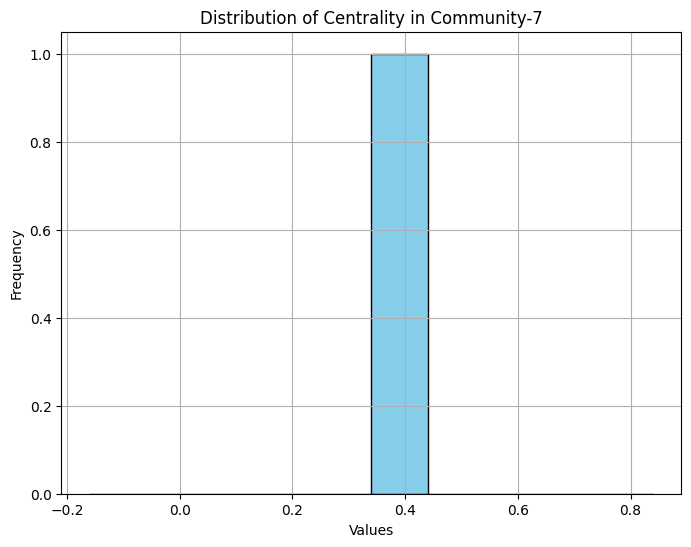

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/community_7_centrality_metric_updates.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Combined Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Centrality in Community-7')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Beta Measure analysis

Calculation of beta measure for each company

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create an empty DataFrame to store company names and beta measures
beta_df = pd.DataFrame(columns=['Company', 'Beta Measure'])
companies_list = final_data['Issuer Name'].unique()
# Loop through each company
for company in companies_list:
    # Extract historical market index data
    market_data = index_data.set_index('Date')['Close']

    # Extract historical stock price data for the company
    company_data = stock_data[stock_data['Issuer Name'] == company].set_index('Date')['Close Price']
    if len(company_data) < 2:
        continue
    # Drop duplicate dates
    company_data = company_data[~company_data.index.duplicated(keep='first')]

    # Combine the data into a DataFrame
    df = pd.DataFrame({'Company': company_data.pct_change(), 'Market': market_data.pct_change()})
    df.dropna(inplace=True)  # Drop rows with NaN values

    # Fit linear regression model
    x = df[['Company']].values.reshape(-1, 1)
    y = df['Market'].values
    model = LinearRegression().fit(x, y)

    # Get beta measure
    beta_measure = model.coef_[0]

    # Append company name and beta measure to the DataFrame
    beta_df = beta_df.append({'Company': company, 'Beta Measure': beta_measure}, ignore_index=True)

print(beta_df)
# Save the DataFrame to a CSV file
beta_df.to_csv('company_beta_measures.csv', index=False)


<ipython-input-34-7d09945c197b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Company': company, 'Beta Measure': beta_measure}, ignore_index=True)
<ipython-input-34-7d09945c197b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Company': company, 'Beta Measure': beta_measure}, ignore_index=True)
<ipython-input-34-7d09945c197b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Company': company, 'Beta Measure': beta_measure}, ignore_index=True)
<ipython-input-34-7d09945c197b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'C

                               Company  Beta Measure
0       InfoBeans Technologies Limited     -0.057629
1         Ultramarine & Pigments Ltd.,     -0.011245
2                   D-Link (India) Ltd     -0.012560
3      Ahluwalia Contracts (India) Ltd     -0.020139
4             Vascon Engineers Limited     -0.001091
...                                ...           ...
1127            Deccan Gold Mines Ltd.     -0.031225
1128                   EFC (I) LIMITED      0.000759
1129              UGRO CAPITAL LIMITED     -0.033320
1130          GIC Housing Finance Ltd.     -0.039446
1131  Monarch Networth Capital Limited      0.013354

[1132 rows x 2 columns]


<ipython-input-34-7d09945c197b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Company': company, 'Beta Measure': beta_measure}, ignore_index=True)


creating to edgelist for all companies

In [ ]:
num_companies = 1132
edge_weights = np.zeros((num_companies, num_companies))
beta_df=pd.read_csv('/content/company_beta_measures.csv')
# Calculate the absolute differences of beta measures between each pair of companies
for i in range(num_companies):
    for j in range(i + 1, num_companies):
        beta_diff = abs(beta_df.iloc[i]['Beta Measure'] - beta_df.iloc[j]['Beta Measure'])
        edge_weights[i, j] = beta_diff

# Convert the matrix into an edge list format
edges = []
for i in range(num_companies):
    for j in range(i + 1, num_companies):
        if edge_weights[i, j] > 0:
            edges.append([beta_df.iloc[i]['Company'], beta_df.iloc[j]['Company'], edge_weights[i, j]])

edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])
edge_list.to_csv('edgelist_beta_measures.csv', index=False)

threshold vs edgeweight graph

In [ ]:
df.describe()

,Beta Measure
count,1132.000000
mean,-0.016618
std,0.022945
min,-0.106141
25%,-0.030943
50%,-0.015568
75%,-0.001569
max,0.093493


threshold vs edges

Processing Thresholds: 100%|██████████| 101/101 [29:25<00:00, 17.48s/it]


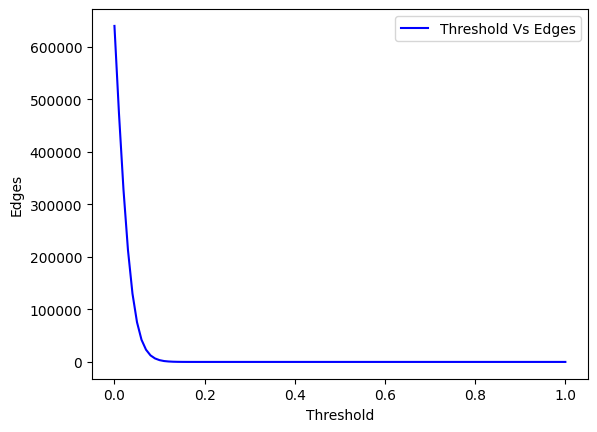

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

start = 0.0
end = 1.0
step = 0.01
company_names = correlation_beta_df.columns.tolist()
threshold = []
degree = []
num_companies = len(company_names)
# Use tqdm to show a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)

    # Create an empty list to store the edges
    edges = []
    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(num_companies):
      for j in range(i + 1, num_companies):
        if correlation_beta_df.iloc[i,j] >=t:
          edges.append([i,j, correlation_beta_df.iloc[i,j]])
    x = len(edges)
    degree.append(x)

# Plot the data
plt.plot(threshold, degree, label='Threshold Vs Edges', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Edges')

# Add a legend
plt.legend()
plt.show()


correlation matrix for absolute difference in beta measure between companies

In [ ]:
from tqdm import tqdm
df=pd.read_csv('company_beta_measures.csv')
correlation_beta_df = pd.DataFrame(index=df['Company'].unique(), columns=df['Company'].unique())
i=0
for issuer_name1 in tqdm(df['Company'].unique(), desc="Processing Issuer Names"):
    j=0
    for issuer_name2 in df['Company'].unique():
        beta_diff = abs(df.iloc[i]['Beta Measure'] - df.iloc[j]['Beta Measure'])
        # Update the corresponding cell in the cosine_similarity_df DataFrame
        correlation_beta_df.at[issuer_name1, issuer_name2] = beta_diff*10
        j+=1
    i+=1
# Save the result to CSV
#correlation_beta_df.to_csv('correlation_beta_df_factor10.csv')

Processing Issuer Names: 100%|██████████████████████████████████████████████████████████████████| 1132/1132 [04:35<00:00,  4.10it/s]


factoring edgeweight by 10 for better analysis

In [ ]:
edgelist['Weight']=edgelist['Weight']*10

In [ ]:
edgelist

,Source,Target,Weight
0,InfoBeans Technologies Limited,"Ultramarine & Pigments Ltd.,",0.463837
1,InfoBeans Technologies Limited,D-Link (India) Ltd,0.450686
2,InfoBeans Technologies Limited,Ahluwalia Contracts (India) Ltd,0.374898
3,InfoBeans Technologies Limited,Vascon Engineers Limited,0.565381
4,InfoBeans Technologies Limited,EXPLEO SOLUTIONS LIMITED,0.238442
...,...,...,...
640141,EFC (I) LIMITED,GIC Housing Finance Ltd.,0.402052
640142,EFC (I) LIMITED,Monarch Networth Capital Limited,0.125949
640143,UGRO CAPITAL LIMITED,GIC Housing Finance Ltd.,0.061267
640144,UGRO CAPITAL LIMITED,Monarch Networth Capital Limited,0.466733


In [ ]:
correlation_beta_df=pd.read_csv('correlation_beta_df_factor10.csv')
print(correlation_beta_df)

                            Unnamed: 0  InfoBeans Technologies Limited  \
0       InfoBeans Technologies Limited                        0.000000   
1         Ultramarine & Pigments Ltd.,                        0.463837   
2                   D-Link (India) Ltd                        0.450686   
3      Ahluwalia Contracts (India) Ltd                        0.374898   
4             Vascon Engineers Limited                        0.565381   
...                                ...                             ...   
1127            Deccan Gold Mines Ltd.                        0.264037   
1128                   EFC (I) LIMITED                        0.583878   
1129              UGRO CAPITAL LIMITED                        0.243093   
1130          GIC Housing Finance Ltd.                        0.181826   
1131  Monarch Networth Capital Limited                        0.709827   

      Ultramarine & Pigments Ltd.,  D-Link (India) Ltd  \
0                         0.463837            0.45068

threshold vs edges for edgeweight by factor 10

Processing Thresholds: 100%|██████████| 101/101 [35:04<00:00, 20.84s/it]


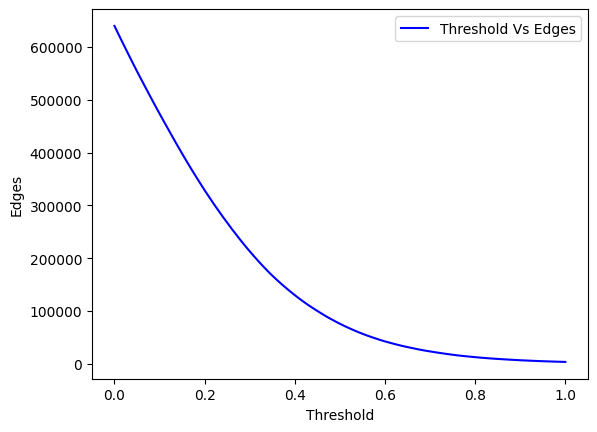

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
start = 0.0
end = 1.0
step = 0.01
company_names = correlation_beta_df.columns.tolist()
threshold = []
degree = []
num_companies = len(company_names)
#correlation_beta_df=pd.read_csv('/content/correlation_beta_df_factor10.csv')
# Use tqdm to show a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)

    # Create an empty list to store the edges
    edges = []
    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(num_companies):
      for j in range(i + 1, num_companies):
        if correlation_beta_df.iloc[i,j] >=t:
          edges.append([i,j, correlation_beta_df.iloc[i,j]])
    x = len(edges)
    degree.append(x)

# Plot the data
plt.plot(threshold, degree, label='Threshold Vs Edges', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Edges')

# Add a legend
plt.legend()
plt.show()


In [ ]:
num_companies = 1132
threshold=0.6
beta_df=pd.read_csv('company_beta_measures.csv')
edges=[]
for i in range(num_companies):
    for j in range(i + 1, num_companies):
        if correlation_beta_df.iloc[i,j]>=threshold:
            edges.append([beta_df.iloc[i]['Company'], beta_df.iloc[j]['Company'], correlation_beta_df.iloc[i,j]])

edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])
edge_list.to_csv('edgelist_beta_measures_threshold.csv', index=False)

In [ ]:
edge_list

,Source,Target,Weight
0,InfoBeans Technologies Limited,Deepak Nitrite Limited,0.629344
1,InfoBeans Technologies Limited,Five-Star Business Finance Ltd.,0.835722
2,InfoBeans Technologies Limited,Global Health Limited,0.670671
3,InfoBeans Technologies Limited,Oil And Natural Gas Corporation Ltd,0.600779
4,InfoBeans Technologies Limited,NHPC Limited,0.923734
...,...,...,...
42275,Steelcast Ltd.,Jai Corp Limited,0.601454
42276,Steelcast Ltd.,GIC Housing Finance Ltd.,0.606369
42277,Man Industries (India) Ltd,TATA STEEL LONG PRODUCTS LIMITED,0.603896
42278,TATA STEEL LONG PRODUCTS LIMITED,Lloyds Metals and Energy Limited,0.715407


In [ ]:
import networkx as nx
# Create an empty graph
G = nx.Graph()

# Iterate over the edge list and add nodes and weighted edges to the graph
for row in edge_list.itertuples():
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight)

communities_generator = nx.community.louvain_communities(G)
communities_l = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities_l)
print("Modularity:", modularity)
print("Number of Communities:", len(communities_l))

Modularity: 0.28743966763273576
Number of Communities: 3


In [ ]:
for i, community in enumerate(communities_l):
  print(f"Community {i + 1}:",len(community))

Community 1: 444
Community 2: 210
Community 3: 478


In [ ]:
import networkx as nx

# Get the greedy modularity communities
communities_generator = nx.community.greedy_modularity_communities(G)
communities = list(communities_generator)  # Get the list of communities

if communities:
    modularity = nx.community.modularity(G, communities)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))

    # Print values in each community
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 0.22732807661755017
Number of Communities: 2
Community 1: 660
Community 2: 472


In [ ]:
# Modularity
communities_generator = nx.community.label_propagation_communities(G)
communities =list(communities_generator)  # Get the first partition

if communities is not None:
    modularity = nx.community.modularity(G, communities_generator)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 1.6653345369377348e-15
Number of Communities: 1
Community 1: 1132


In [ ]:
# Modularity
communities_generator = nx.community.kernighan_lin_bisection(G)
communities =list(communities_generator)  # Get the first partition

if communities is not None:
    modularity = nx.community.modularity(G, communities_generator)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 0.24105753973234562
Number of Communities: 2
Community 1: 566
Community 2: 566
